# Programming for Data Analysis Assignment 1 Notebook

Author - Sean Humphreys

---

## Contents

1. [Introduction](#introduction)
2. [Software Libraries](#software-libraries)
3. [Dataset Exploration](#dataset-exploration)
4. [Dataset Variables](#dataset-variables)
5. [Random Probability Distribution](#random-probability-distribution)
    1. [Wind Speed](#wind-speed)
    2. [Gust Speed](#gust-speed)
    3. [Humidity](#humidity)
    4. [Average Wind Chill](#average-wind-chill)
    5. [Wind Chill Minimum](#wind-chill-minimum)
    6. [Average Daily Temperature](#average-daily-temperature)
    7. [Daily Temperature Low](#daily-temperature-low)
    8. [Daily Temperature High](#daily-temperature-high)
    9. [Air Pressure](#air-pressure)
6. [Synthesised Dataset](#synthesised-dataset)
7. [Correlation ](#correlation)
4. [References](#references)
5. [Associated Reading](#associated-reading)

---

## Introduction <a id="introduction"></a>

Weather, to a great extent, determines humans and other living beings way of life. Weather patterns and extreme weather events affect areas as diverse as the clothes we wear, the migratory patterns of birds (Cooper et al., 2023), agriculture (e.g., Wheeler et al. 2000; Asseng et al. 2011) and health (Pascual et al. 2006; Kjellstrom et al. 2009). To be able to manage the effects of climate change the ability to accurately model weather systems is of growing importance. In terms of energy security, being able to accurately map wind patterns is of crucial importance when it comes to wind power generation.

The dataset explored and synthesised in this notebook is from a weather sensor in the author's back garden. The data extract is in the form of a csv. The source data csv can be accessed [here](datasets/back_garden_sensor_data_12_months.csv). The extract contains local weather data captured over a 357 day period.

Each variable in the dataset is visualised, assessed for probability distribution fit and subsequently modelled.

---

## Software Libraries <a id="software-libraries"></a>

The following software libraries are used in this notebook:

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 8 Nov. 2023) - is an open-source software library for creating static, animated, and interactive visualizations in Python.

- [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 8. Nov 2023) - is an open-source software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure.

- [Pathlib](https://docs.python.org/3/library/pathlib.html) (https://docs.python.org/3/library/pathlib.html - last accessed 23 Nov. 2023) -  a python module that offers classes representing filesystem paths with semantics appropriate for different operating systems.

- [SciPy](https://scipy.org/) (https://scipy.org/ - last accessed 21 Nov. 2023) provides algorithms for scientific computing in Python. SciPy is a portmanteau of Scientific Python. It is a scientific computation library that uses NumPy underneath.

- [Seaborn](https://seaborn.pydata.org/) (https://seaborn.pydata.org/ - last accessed 23 Nov. 2023) - is visualisation software that is built on matplotlib. It offers a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import the required software libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from pathlib import Path

---

## Dataset Exploration <a id="dataset-exploration"></a>

The Pandas software library is used to clean and process datasets. The dataset csv file is read into Pandas as a Pandas DatFrame.

In [2]:
# use pandas to read in the dataset
garden_weather = pd.read_csv('datasets/back_garden_sensor_data_12_months.csv')

The first and last 5 rows of the DataFrame can be inspected to ascertain if there is any obvious data quality issues. This is done using the Pandas `head()` and `tail()` methods. The first and last 5 rows of data are checked.

In [3]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.head()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
0,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
1,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
3,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
4,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


In [4]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.tail()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
352,27/10/2023 00:00,0.2,1.5,91.0,16.8,5.0,9.58,5.0,16.8,983.9
353,28/10/2023 00:00,0.5,2.2,91.0,17.0,6.7,10.32,6.7,17.0,980.4
354,29/10/2023 00:00,1.3,4.9,92.0,13.4,3.6,8.36,3.6,13.4,979.6
355,30/10/2023 00:00,0.1,0.6,93.0,13.9,4.7,8.94,4.7,13.9,989.5
356,31/10/2023 00:00,0.6,2.5,93.0,15.9,5.5,9.91,5.5,15.9,994.5


Using Pandas the column names can be renamed to make them python friendly.

In [5]:
# python friendly column names list
column_rename = ['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 
                 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius', 'outside_air_pres_hPa']

# rename columns - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ [Accessed 7 Nov. 2023].
garden_weather.columns = column_rename

The Pandas `info()` method is used to print more information about the DataFrame. The renamed columns are confirmed from the output of this command. The Pandas Dtype (datatype) for each variable is displayed. The range index indicates that there are 357 rows in the dataset.

In [6]:
# Code from https://www.w3schools.com/python/pandas/ref_df_info.asp [Accessed 7 Nov. 2023].
garden_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date_time                       357 non-null    object 
 1   wind_speed_m_s                  356 non-null    float64
 2   gust_m_s                        356 non-null    float64
 3   humidity_%                      356 non-null    float64
 4   chill_celsius                   356 non-null    float64
 5   chill_minimum_celsius           356 non-null    float64
 6   temperature_average_celsius     356 non-null    float64
 7   temperature_range_low_celsius   356 non-null    float64
 8   temperature_range_high_celsius  356 non-null    float64
 9   outside_air_pres_hPa            356 non-null    float64
dtypes: float64(9), object(1)
memory usage: 28.0+ KB


The variables in the *date_time* column are stored as objects. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018). The values in this column are character strings and do not provide any datetime operations (e.g. extract the year, day of the week, etc.). The Pandas `to_datetime()` function can be applied to this data. Pandas interprets the strings and convert these to datetime objects. This allows for examining details during specific time periods of interest, and zooming out to explore variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends (Walker, 2019).

In [7]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
garden_weather['time_series'] = pd.to_datetime(garden_weather['date_time'], dayfirst=True, format='%d/%m/%Y %H:%M')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
garden_weather = garden_weather.set_index('time_series')

The rest of the variables in the dataset are stored as 64bit floating point integers. 64-bit datatypes allow for a high degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.

Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python and could lead to inaccuracies when modelling data.

After re-indexing the DataFrame a visual check can be made to validate the changes. 

In [8]:
# quick visual validation of the changes to the dataframe
garden_weather.head()

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,
2022-11-09,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
2022-11-10,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2022-11-11,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
2022-11-12,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
2022-11-13,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


The dataset is checked for missing values using the `isnull()` function chained with the `sum()` function.

In [9]:
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ - [Accessed 7 Nov. 2023].
garden_weather.isnull().sum()

date_time                         0
wind_speed_m_s                    1
gust_m_s                          1
humidity_%                        1
chill_celsius                     1
chill_minimum_celsius             1
temperature_average_celsius       1
temperature_range_low_celsius     1
temperature_range_high_celsius    1
outside_air_pres_hPa              1
dtype: int64

One null values is demonstrated in all of the columns except the *date_time* column. The presence of missing values in any dataset is an issue in so far as it can create a lack of relatability or trustworthiness in the dataset (Kumar, 2021). Consequently, if a strategy to manage missing values during model development is not employed insight could be lost leading to incorrect results (Tamboli, 2021). To synthesise or model the dataset the null values will need to be managed.

Inspect the dataset for any duplicate rows across all columns.

In [10]:
# https://www.statology.org/pandas-find-duplicates/ [Accessed 07 Nov.2023]
duplicate_rows = garden_weather[garden_weather.duplicated()]

duplicate_rows

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,


No duplicate rows are demonstrated.

## Dataset Variables <a id="dataset-variables"></a>

The dataset consists of 10 variables. When examining the dataset variables it is useful to look at their classification as this in turn will dictate how they can be analysed.

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

**Levels of Measurement Summary Table**

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying variable classification and level of measurement the dataset can be summarised as follows:

**Variable Summary Table**

| Variable                      | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------                   | :----------       | :----------   | :----------   | :---------        | :---------        |
| date_time                     | numerical         | *             | Object        | date              | interval          |
| wind_speed_m_s                | numerical         | continuous    | float64       | m/s               | ratio             |
| gust_m_s                      | numerical         | continuous    | float64       | m/s               | ratio             |
| humidity_%                    | numerical         | continuous    | float64       | %                 | ratio             |
| chill_celsius                 | numerical         | continuous    | float64       | degrees celcius   | ratio             |
| chill_minimum_celsius         | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_average_celsius   | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_low_celsius | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_high_celsius| numerical         | continuous    | float64       | degrees celcius   | interval          |
| outside_air_pres_hPa          | numerical         | continuous    | float64       | hPa               | interval          |

\* date and time can be continuous or discreet depending on use (Treadwell, 2014).

Complex mathematical operations can be carried out on interval and ratio datatypes. Measures of central tendency on these datatypes include mode, median and arithmetic mean (Bhandari, 2020). The measure of variability include range, interquartile range standard deviation and variance (op. cit.). Knowing these measures for the variable will enable modelling of the data. These values can be automatically calculated using the Pandas `describe()` method (www.javatpoint.com, n.d.).

In [11]:
# assign variable so that values can be accessed later
data_summary = garden_weather.describe()
data_summary

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,1.695506,5.191573,81.098315,17.388483,7.170506,11.589916,7.444382,17.445506,1012.151685
std,1.108015,2.960850,5.646277,6.571938,4.910919,5.112865,4.695277,6.499136,12.948221
min,0.100000,0.600000,60.000000,3.400000,-5.800000,-1.750000,-5.800000,3.400000,977.000000
25%,0.800000,3.000000,78.000000,11.775000,3.675000,7.730000,4.100000,11.800000,1004.375000
50%,1.500000,4.600000,81.000000,17.450000,7.600000,11.790000,7.750000,17.450000,1013.350000
75%,2.300000,6.700000,85.000000,23.100000,11.200000,15.517500,11.200000,23.100000,1020.650000
max,5.500000,15.600000,94.000000,32.800000,17.800000,22.510000,17.800000,32.800000,1045.200000


---

## Random Probability Distribution <a id="random-probability-distribution"></a>

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

A python function can be defined in order to test the best probability distribution fit for a dataset variable. The function defined below tests for the most commonly used probability distributions in weather data modelling and returns the best fit distribution and . Literature on weather data probability modelling can be accessed [here](/journal_articles/).

In [12]:
# adapted from code accessed here - https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023]
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", 'rayleigh', 'gamma', 'uniform', 'lognorm', 'logistic', 'gumbel_r', 'gumbel_l']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

A second fit test function is defined. In this function the *lognorm* test is not performed. The reason for this is that testing for the Exponeniated Weibull is throwing the following error on some seasonal variables -  *RuntimeWarning* - *RuntimeWarning: invalid value encountered in add logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +*

In [13]:
def no_exp_get_best_distribution(data):
    dist_names = ["norm", "weibull_max", "weibull_min", "pareto", "genextreme", 'rayleigh', 'gamma', 'uniform', 'lognorm', 'logistic', 'gumbel_r', 'gumbel_l']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

Weather variables are subject to seasonal variation. For example, Harmel et al. (2002) and Ruff and Neelin (2012) provide evidence that the distribution of daily temperature data is skewed and that the skewness depends on the season. As per Wikipedia (Wikipedia Contributors, 2023), Ireland experiences 4 seasons:

- Winter = November, December & January
- Spring = February, March & April
- Summer = May, June & July
- Autumn = August, September & October

The full dataset is filtered into seasonal data and the distribution modelling is explored in the context of season as opposed to the full year.

In [14]:
# Filter DateFrame by seasons - https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 8 Nov. 2023]. 
winter = garden_weather[garden_weather.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
spring = garden_weather[garden_weather.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
summer = garden_weather[garden_weather.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
autumn = garden_weather[garden_weather.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)


As the number of days in each season is not equal it is useful to create a variable that equates to the number of days in the season. This variable is used when modelling the seasonal data for each variable.

In [15]:
# define a variable for the number of rows that equals the number of days in each season variable
winter_rows = winter.shape[0]
spring_rows = spring.shape[0]
summer_rows = summer.shape[0]
autumn_rows = summer.shape[0]

Before any assessment of distribution fit or data modelling the presence of null values in the dataset must be addressed. This is achieved by replacing null them with the median value. The null values are located in spring and autumn.

In [16]:
# check for null values
spring.isnull().sum()

date_time                         0
wind_speed_m_s                    0
gust_m_s                          0
humidity_%                        0
chill_celsius                     0
chill_minimum_celsius             0
temperature_average_celsius       0
temperature_range_low_celsius     0
temperature_range_high_celsius    0
outside_air_pres_hPa              1
dtype: int64

In [17]:
autumn.isnull().sum()

date_time                         0
wind_speed_m_s                    1
gust_m_s                          1
humidity_%                        1
chill_celsius                     1
chill_minimum_celsius             1
temperature_average_celsius       1
temperature_range_low_celsius     1
temperature_range_high_celsius    1
outside_air_pres_hPa              0
dtype: int64

In [18]:
# replace nan values with the median - Zach (2022). The model could be unreliable if null values are not managed (Tamboli, 2021) 
spring = spring.fillna(spring.median(numeric_only=True))
autumn = autumn.fillna(autumn.median(numeric_only=True))


Once the null values have been desalt with the dataset can be validated to double check that no null values remain.

In [19]:
#validate na corrective action
autumn.isnull().sum()

date_time                         0
wind_speed_m_s                    0
gust_m_s                          0
humidity_%                        0
chill_celsius                     0
chill_minimum_celsius             0
temperature_average_celsius       0
temperature_range_low_celsius     0
temperature_range_high_celsius    0
outside_air_pres_hPa              0
dtype: int64

In [20]:
#validate na corrective action
spring.isnull().sum()

date_time                         0
wind_speed_m_s                    0
gust_m_s                          0
humidity_%                        0
chill_celsius                     0
chill_minimum_celsius             0
temperature_average_celsius       0
temperature_range_low_celsius     0
temperature_range_high_celsius    0
outside_air_pres_hPa              0
dtype: int64

### Wind Speed <a id="wind-speed"></a>

Literature suggests that the Rayleigh distribution can be used to model wind speed. 

*Rayleigh's distribution can be used to describe the wind variations in a wind regime with an acceptable level of
accuracy without the need for data collected over short time intervals, as is the case of the Weibull distribution,
because in many cases, such information cannot be available.* (Paraschiv, Paraschiv and Ion, 2019).

The wind speed variable in the dataset is an average daily value which relative to an hourly value is a much longer time interval and therefore would be better suited to the Rayleigh model than the Weibull distribution.

The probability density function (PDF) of the Rayleigh is expressed mathematically as:

$f(x;\sigma )={\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})},\quad x\geq 0,$

where $\sigma$ is the scale parameter of the distribution.

The graphic below illustrates the effect of scale ($\sigma$) on the Rayleigh distribution PDF.

**Rayleigh Distribution** - Krishnavedala, CC0, via Wikimedia Commons

![Rayleigh Distribution Curves](images/illustrations/768px-Rayleigh_distributionPDF.svg.png "Rayleigh Distribution Curve")

Using numpy it is possible to draw samples from the Rayleigh distribution. The python syntax of the Rayleigh distribution is `random.Generator.rayleigh(scale=1.0, size=None)`. The scale also equals the mode also equals the mode (numpy.org, n.d.).

Plotting histograms of the distribution of the wind speed variable gives an illustration of the fit of the probability distribution model.

Using the *scipy* library it is possible to calculate the Rayleigh parameters (location and scale), for each season, using the `fit()` method.

Define variables for the Rayleigh parameters that are required to draw samples from the Rayleigh distribution.

In [21]:
from scipy import stats

winter_loc, winter_scale = stats.rayleigh.fit(winter['wind_speed_m_s'])
spring_loc, spring_scale = stats.rayleigh.fit(spring['wind_speed_m_s'])
summer_loc, summer_scale = stats.rayleigh.fit(summer['wind_speed_m_s'])
autumn_loc, autumn_scale = stats.rayleigh.fit(autumn['wind_speed_m_s'])

Once the location and fit parameters are known they can be used to plot the probability density function over a histogram of the dataset to give a visual representation of the fit of the Rayleigh probability distribution function.

Define a variable for the x axis on the probability plot.

In [22]:
# code adapted from https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

winter_xl = np.linspace(winter['wind_speed_m_s'].min(), winter['wind_speed_m_s'].max())
spring_xl = np.linspace(spring['wind_speed_m_s'].min(), spring['wind_speed_m_s'].max())
summer_xl = np.linspace(summer['wind_speed_m_s'].min(), summer['wind_speed_m_s'].max())
autumn_xl = np.linspace(winter['wind_speed_m_s'].min(), autumn['wind_speed_m_s'].max())

Create an empty plot and plot histograms of the wind speed variable for each season and overlay the Rayleigh probability distribution for that season over the histogram. This allows visualisation of the fit of the Rayleigh probability distribution on the seasonal wind speed variables.

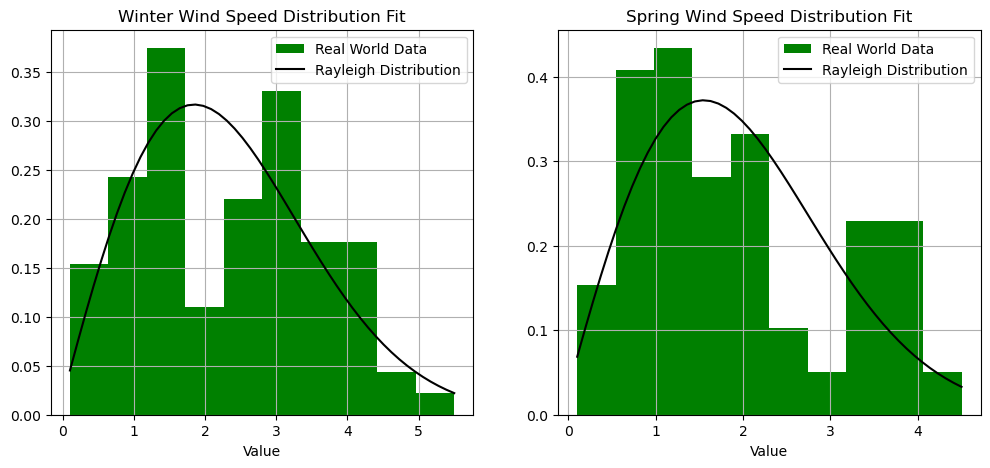

In [23]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# Display Results:
axe[0].hist(winter['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(winter_xl,stats.rayleigh(scale=winter_scale, loc=winter_loc).pdf(winter_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Winter Wind Speed Distribution Fit")
axe[0].set_xlabel("Value")
axe[0].legend()
axe[0].grid()
axe[1].hist(spring['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(spring_xl,stats.rayleigh(scale=spring_scale, loc=spring_loc).pdf(spring_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Spring Wind Speed Distribution Fit")
axe[1].set_xlabel("Value")
axe[1].legend()
axe[1].grid()


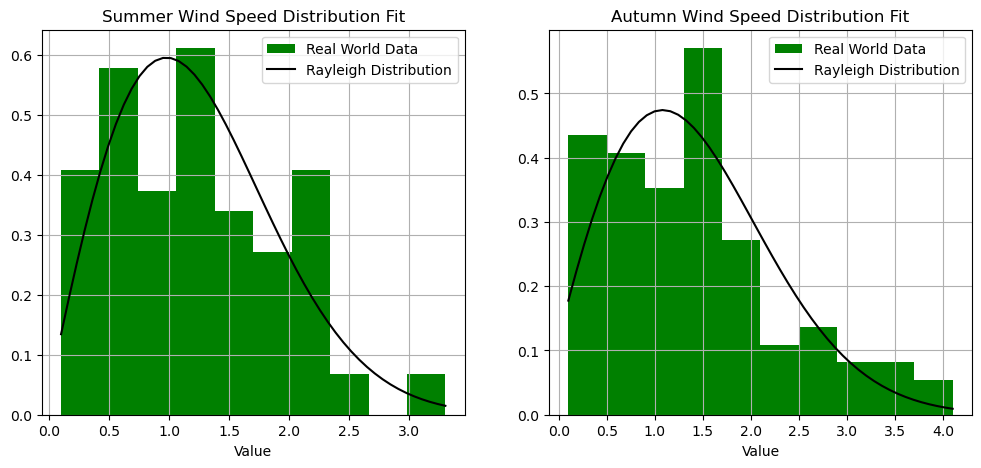

In [24]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# Display Results:
axe[0].hist(summer['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(summer_xl,stats.rayleigh(scale=summer_scale, loc=summer_loc).pdf(summer_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Summer Wind Speed Distribution Fit")
axe[0].set_xlabel("Value")
axe[0].legend()
axe[0].grid()
axe[1].hist(autumn['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(autumn_xl,stats.rayleigh(scale=autumn_scale, loc=autumn_loc).pdf(autumn_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Autumn Wind Speed Distribution Fit")
axe[1].set_xlabel("Value")
axe[1].legend()
axe[1].grid()

The PDF of the Rayleigh distribution does not appear to be a good fit. Applying a more scientific approach to probability distribution fit yields different results.

In [25]:
get_best_distribution(winter['wind_speed_m_s'])

Best fitting distribution: exponweib
Best p value: 0.6821732124385185
Parameters for the best fit: (0.27503724293176923, 4.5263439574972955, 0.08118342282389561, 3.839729030711695)


With a fit score $\approx$ 0.68, vs $\approx$ 0.3 for Rayleigh, the *exponweib* distrubtion is the best fit out of commonly used weather probability distributions. The Exponentiated Weibull distribution is an extension of the Weibull distribution.

Expressed mathematically the density of of the Exponentiated Weibull distribution is:

$f(x;k,\lambda; \alpha) = \alpha  \frac{k}{\lambda}\left[\frac{x}{\lambda}\right]^{k-1}\left[1- e^{-(x/\lambda)^k} \right]^{\alpha-1}e^{-(x/\lambda)^k}$

k is the first shape parameter, α is the second shape parameter and λ is the scale parameter of the distribution.

In [26]:
# import exponweib from SciPy
from scipy.stats import exponweib

The Exponential Weibull PDF is visualised over the distribution with the following code. The appearance of the PDF appears to be a better fit on the synthesised data. It is worth noting that as this is a visual check it is subjective.

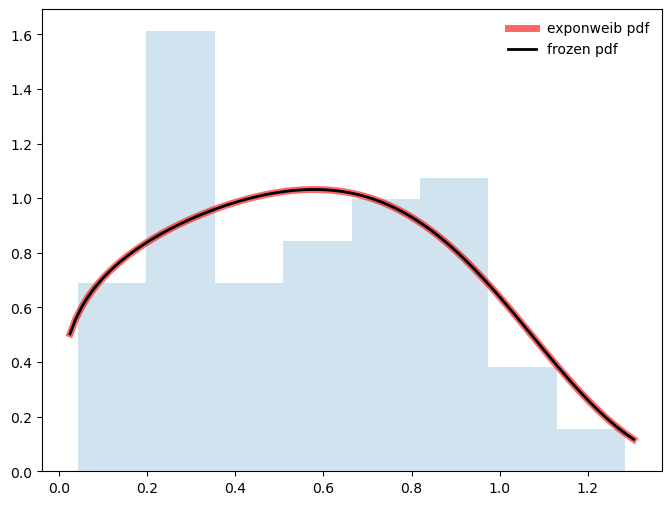

In [27]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

# create an empty plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# define distribujtion parameters
a, c = 0.27503724293176923, 4.5263439574972955

# define x axis for PDF
x = np.linspace(exponweib.ppf(.01, a, c), exponweib.ppf(.99, a, c), 100)

# plot exponweib PDF
ax.plot(x, exponweib.pdf(x, a, c), 'r-', lw=5, alpha=0.6, label='exponweib pdf')

rv = exponweib(a, c)

# plot frozen PDF
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = exponweib.rvs(0.27503724293176923, 4.5263439574972955, size=winter_rows)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

The spring, summer and autumn distributions are tested for the best fit probability distributions. It is noted worthy that two out of the four distributions are the Exponeniated Weibull. This would suggest that it may be a good probability distribution to model wind speed. Also of note is that all four distributions are a variation on the Weibull distribution.

In [28]:
get_best_distribution(spring['wind_speed_m_s'])

Best fitting distribution: weibull_min
Best p value: 0.47039408529885784
Parameters for the best fit: (1.686915750837759, 0.05214958079737202, 2.0938087377064027)


In [29]:
get_best_distribution(summer['wind_speed_m_s'])

Best fitting distribution: exponweib
Best p value: 0.909743219742408
Parameters for the best fit: (0.527150521065729, 2.4073099967209144, 0.09066482072729054, 1.6824407813453073)


In [30]:
no_exp_get_best_distribution(autumn['wind_speed_m_s'])

Best fitting distribution: weibull_max
Best p value: 0.7376875596077592
Parameters for the best fit: (44848430.05044524, 31526631.18699876, 31526630.233248726)


The best fit distribution for the wind speed variable are summarised as follows:

| Season    | Variable          |Best Fit Distribution      |
| :-----    | :-------          |:----------                |
| Winter    | wind_speed_m_s    | Exponentiated Weibull     |
| Spring    | wind_speed_m_s    | Weibull Minimum           |
| Summer    | wind_speed_m_s    | Exponentiated Weibull     |
| Autumn    | wind_speed_m_s    | Weibull Maximum           |

To model the data samples are randomly drawn from the relevant distributions:

In [31]:
# import the required probability distribution from SciPy
from scipy.stats import weibull_min
from scipy.stats import exponweib
from scipy.stats import weibull_max

In [32]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

# synthesise data based on the parameters of the best fit probability distribution models 
winter_wind_speed_model = exponweib.rvs(0.27503724293176923, 4.5263439574972955, 0.08118342282389561, 3.839729030711695, size = winter_rows)
spring_wind_speed_model = weibull_min.rvs(1.686915750837759, 0.05214958079737202, 2.0938087377064027, size = spring_rows)
summer_wind_speed_model = exponweib.rvs(0.527150521065729, 2.4073099967209144, 0.09066482072729054, 1.6824407813453073, size = summer_rows)
autumn_wind_speed_model = weibull_max.rvs(44848430.05044524, 31526631.18699876, 31526630.233248726, size = autumn_rows)

The modelled data can be visualised and the Kernel Density Estimation (KDE) overlaid on the histogram. KDE is the application of 
kernel smoothing for probability density estimation.

Of note, the KDE shape of the real world winter wind speed plot and the modelled winter wind speed plot are nearly identical in shape. The range of values while not identical is extremely close. The main difference between the model and the real world winter wind speed date is distribution of the range is not similar but not identical.  

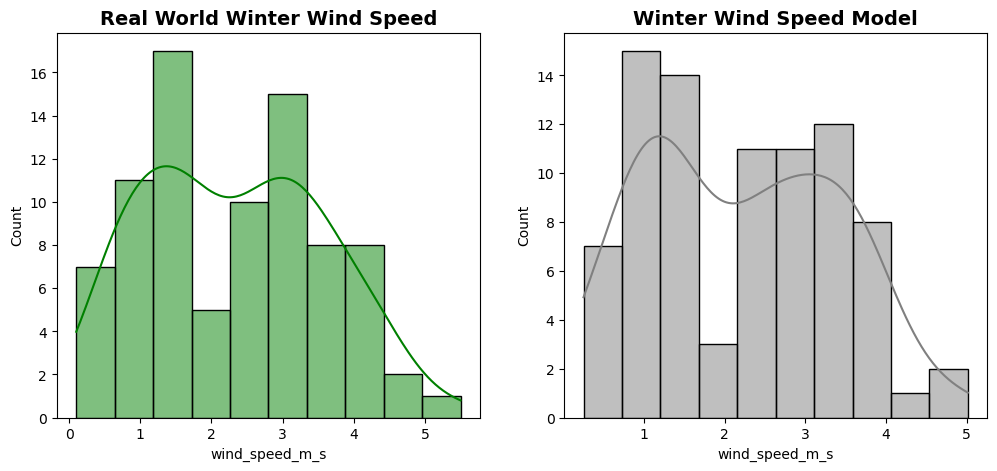

In [33]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(winter['wind_speed_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Winter Wind Speed', color='black', size=14, weight='bold')
sns.histplot(winter_wind_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Winter Wind Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='wind_speed_m_s')

plt.show()

The real world spring wind speed data and the spring wind speed model are similar in terms of the range of data and how the data is distributed. Towards the upper end of the range distributions are not as well mirrored.

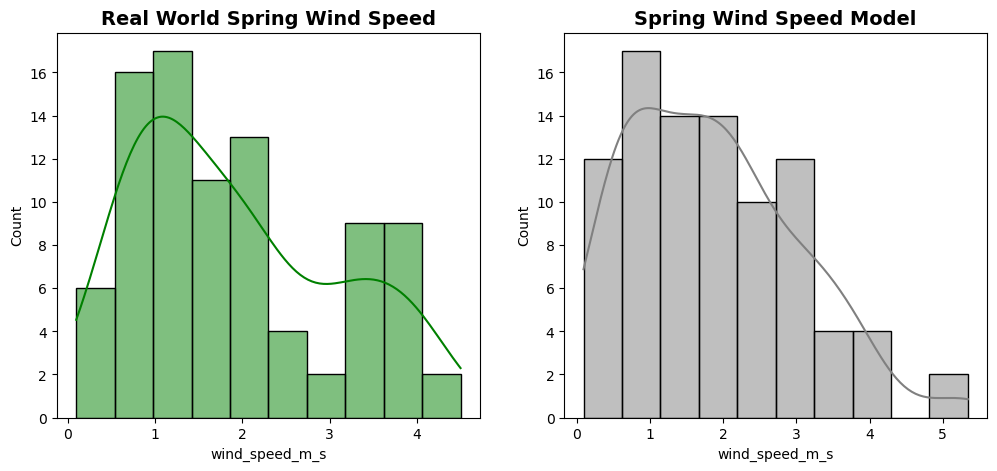

In [34]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(spring['wind_speed_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Spring Wind Speed', color='black', size=14, weight='bold')
sns.histplot(spring_wind_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Spring Wind Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='wind_speed_m_s')

plt.show()

The summer wind sped data and the summer model of the wind sped data mirror each other very closely.

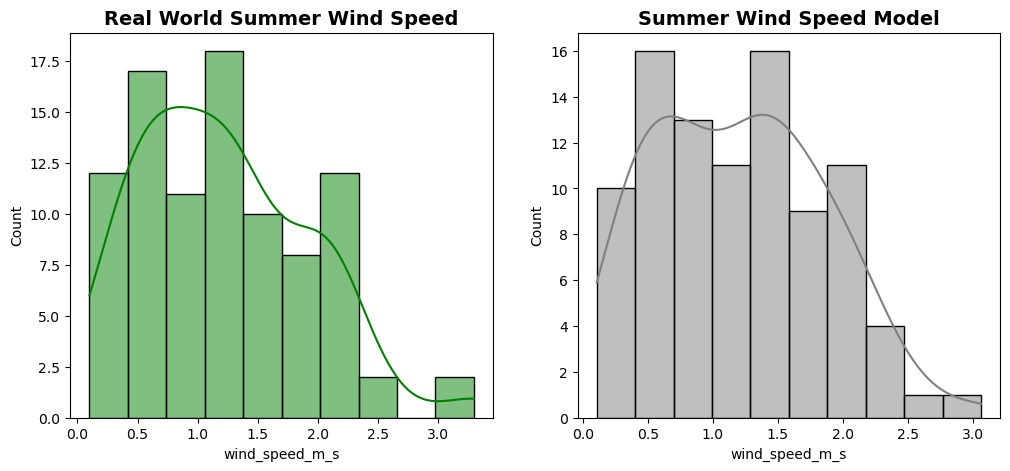

In [35]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(summer['wind_speed_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Summer Wind Speed', color='black', size=14, weight='bold')
sns.histplot(summer_wind_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Summer Wind Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='wind_speed_m_s')

plt.show()

The Autumn model and the autumn real world data are very similar in appearance.

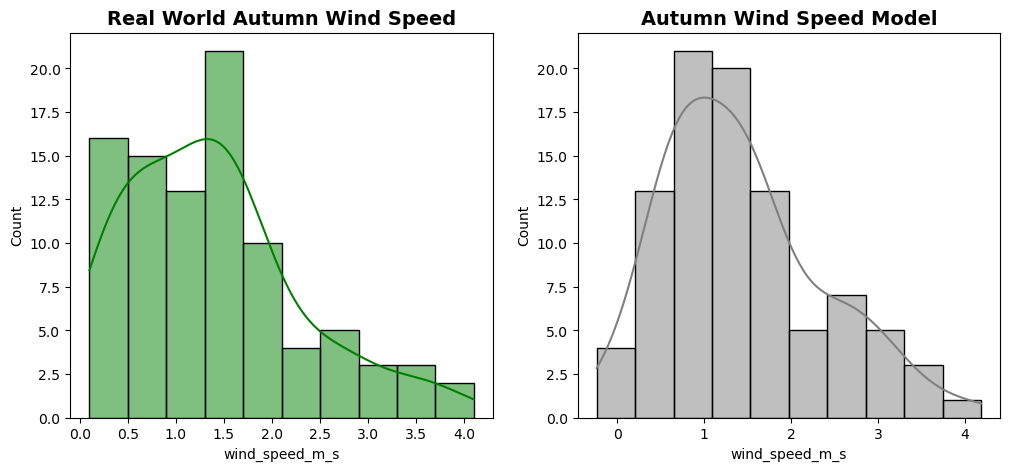

In [36]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(autumn['wind_speed_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Autumn Wind Speed', color='black', size=14, weight='bold')
sns.histplot(autumn_wind_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Autumn Wind Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='wind_speed_m_s')

plt.show()

### Gust Speed <a id="gust-speed"></a>

As the gust speed variable is a measure of wind variations over time it can be modelled in the same as wind speed using Rayleigh distribution. 

Calculate the Rayleigh parameters (location and scale), for each season, using the 'fit()' method.

In [37]:
winter_gust_loc, winter_gust_scale = stats.rayleigh.fit(winter['gust_m_s'])
spring_gust_loc, spring_gust_scale = stats.rayleigh.fit(spring['gust_m_s'])
summer_gust_loc, summer_gust_scale = stats.rayleigh.fit(summer['gust_m_s'])
autumn_gust_loc, autumn_gust_scale = stats.rayleigh.fit(autumn['gust_m_s'])

Define a variable for the x axis on the probability plot.

In [38]:
winter_gust_xl = np.linspace(winter['gust_m_s'].min(), winter['gust_m_s'].max())
spring_gust_xl = np.linspace(spring['gust_m_s'].min(), spring['gust_m_s'].max())
summer_gust_xl = np.linspace(summer['gust_m_s'].min(), summer['gust_m_s'].max())
autumn_gust_xl = np.linspace(winter['gust_m_s'].min(), autumn['gust_m_s'].max())

Plot the Raleigh distribution and overlay the PDF in order to get a visual illustration of the model fit.

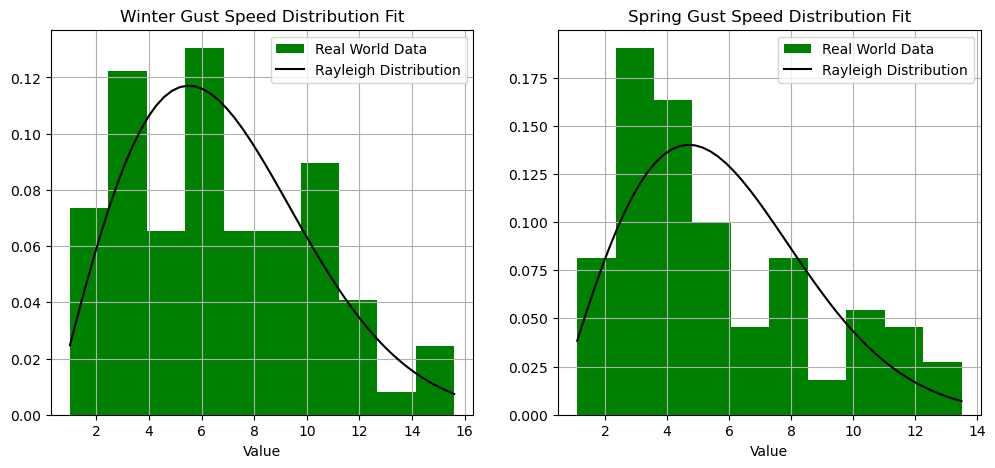

In [39]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF
axe[0].hist(winter['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(winter_gust_xl,stats.rayleigh(scale=winter_gust_scale, loc=winter_gust_loc).pdf(winter_gust_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Winter Gust Speed Distribution Fit")
axe[0].set_xlabel("Value")
axe[0].legend()
axe[0].grid()
axe[1].hist(spring['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(spring_gust_xl,stats.rayleigh(scale=spring_gust_scale, loc=spring_gust_loc).pdf(spring_gust_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Spring Gust Speed Distribution Fit")
axe[1].set_xlabel("Value")
axe[1].legend()
axe[1].grid()

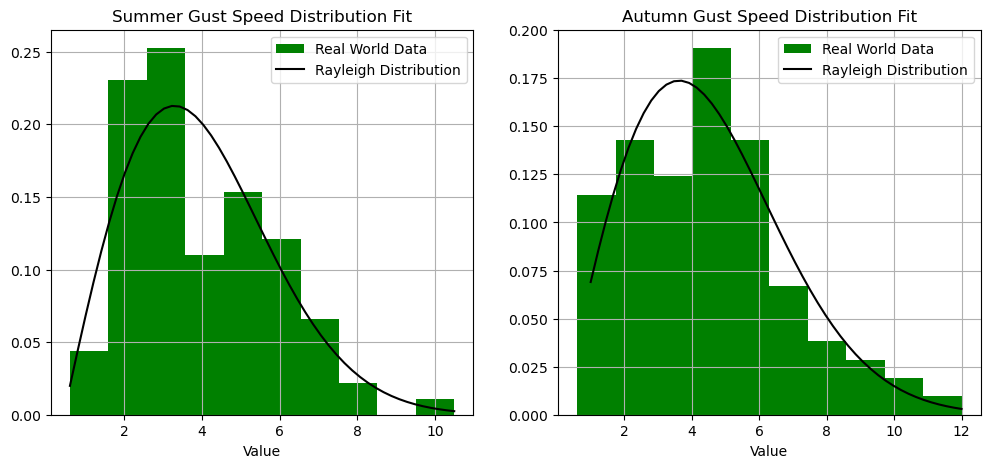

In [40]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF

axe[0].hist(summer['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(summer_gust_xl,stats.rayleigh(scale=summer_gust_scale, loc=summer_gust_loc).pdf(summer_gust_xl), label="Rayleigh Distribution", color='black')
axe[0].set_title("Summer Gust Speed Distribution Fit")
axe[0].set_xlabel("Value")
axe[0].legend()
axe[0].grid()

axe[1].hist(autumn['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(autumn_gust_xl,stats.rayleigh(scale=autumn_gust_scale, loc=autumn_gust_loc).pdf(autumn_gust_xl), label="Rayleigh Distribution", color='black')
axe[1].set_title("Autumn Gust Speed Distribution Fit")
axe[1].set_xlabel("Value")
axe[1].legend()
axe[1].grid()

Once again visually the Rayleigh distribution does not look like a good fit. Testing the variables using the fit test gives a more scientific measure of the best fit probability distribution.

In [41]:
get_best_distribution(winter['gust_m_s'])

Best fitting distribution: exponweib
Best p value: 0.8248795976210808
Parameters for the best fit: (0.3728841526180775, 3.20036258027839, 0.9578959419085717, 9.583125810337737)


In [42]:
get_best_distribution(spring['gust_m_s'])

Best fitting distribution: lognorm
Best p value: 0.9111480663528143
Parameters for the best fit: (0.5836265765155182, 0.09359040160557448, 4.705269873959963)


In [43]:
get_best_distribution(summer['gust_m_s'])

Best fitting distribution: gamma
Best p value: 0.5631180939018307
Parameters for the best fit: (4.86425634339127, -0.16421006810552352, 0.8587654709989414)


In [44]:
get_best_distribution(autumn['gust_m_s'])

Best fitting distribution: rayleigh
Best p value: 0.9148765601095433
Parameters for the best fit: (0.1327210847310841, 3.49026626468912)


The best fit distribution for the gust speed variable are summarised as follows:

| Season    | Variable    |Best Fit Distribution    |
| :-----    | :-------    |:----------              |
| Winter    | gust_m_s    | Exponentiated Weibull   |
| Spring    | gust_m_s    | Log Normal              |
| Summer    | gust_m_s    | Gamma                   |
| Autumn    | gust_m_s    | Rayleigh                |

To model the data samples are randomly drawn from the relevant distributions:

In [45]:
# import the required distributions from SciPy
from scipy.stats import lognorm
from scipy.stats import gamma
from scipy.stats import rayleigh

In [46]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_gust_speed_model = exponweib.rvs(0.3728841526180775, 3.20036258027839, 0.9578959419085717, 9.583125810337737, size = winter_rows)
spring_gust_speed_model = lognorm.rvs(0.5836265765155182, 0.09359040160557448, 4.705269873959963, size = spring_rows)
summer_gust_speed_model = gamma.rvs(4.86425634339127, -0.16421006810552352, 0.8587654709989414, size = summer_rows)
autumn_gust_speed_model = rayleigh.rvs(0.1327210847310841, 3.49026626468912, size = autumn_rows)

Potting histograms and over laying the KDE for the real world gust speed data and the modelled gust speed data allows a visual, if not subjective, comparison of the model to the real world data.

Comparing the real world and modelled gust speed data the range of values is nearly identical. The overall shape of the histogram for hte modelled data is very similar to the real world data. The higher count count of values at 6 m/s is not present in the model. 

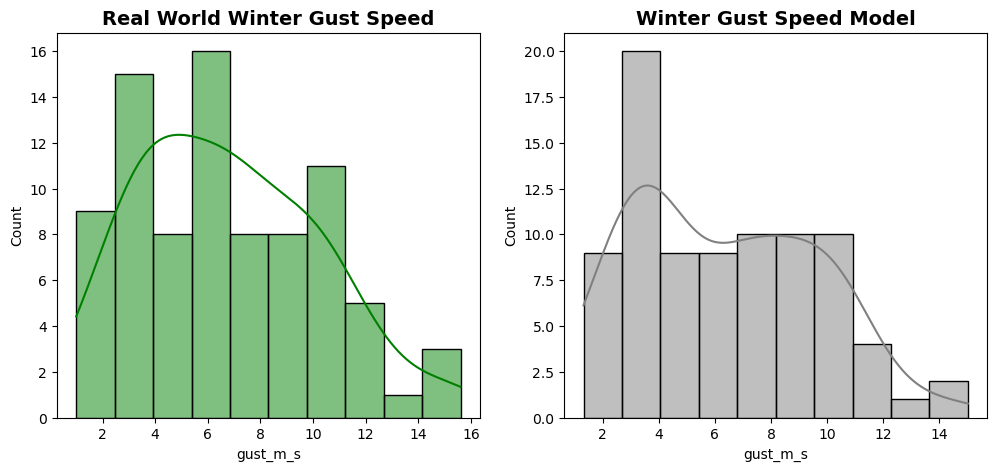

In [47]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(winter['gust_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Winter Gust Speed', color='black', size=14, weight='bold')
sns.histplot(winter_gust_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Winter Gust Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='gust_m_s')

plt.show()

The spring gust speed model is very similar to the real word data in the sense that there is a high concentration of wind speeds below 6 m/s that tapers off above that value. The most obvious difference between the model and the real world data is that there is a greater range of values present in the model than in the real world data.

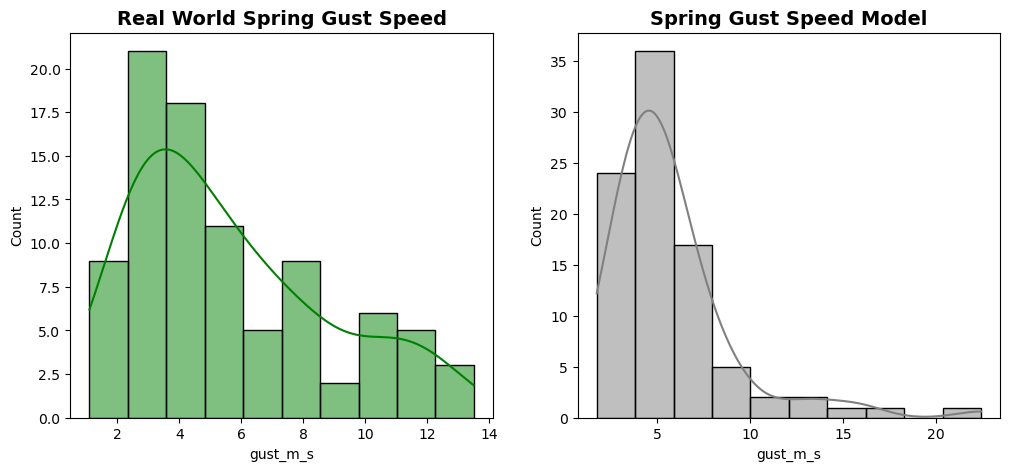

In [48]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(spring['gust_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Spring Gust Speed', color='black', size=14, weight='bold')
sns.histplot(spring_gust_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Spring Gust Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='gust_m_s')

plt.show()

The summer gust speed real world data and model data are very closely mirrored.

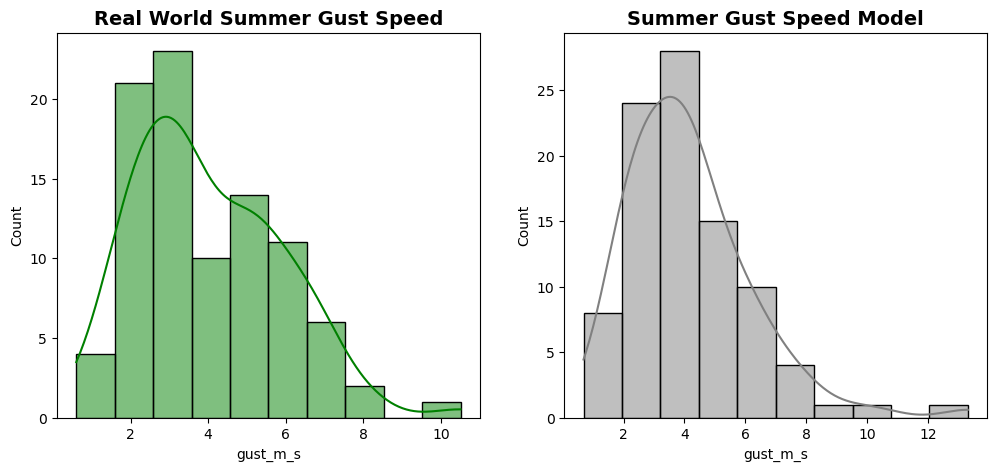

In [49]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(summer['gust_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Summer Gust Speed', color='black', size=14, weight='bold')
sns.histplot(summer_gust_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Summer Gust Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='gust_m_s')

plt.show()

Once again the real world data and the modelled data for autumn gust speeds are similar. There is a higher occurrence of lower gust speeds in the real world data than in the modelled data.  

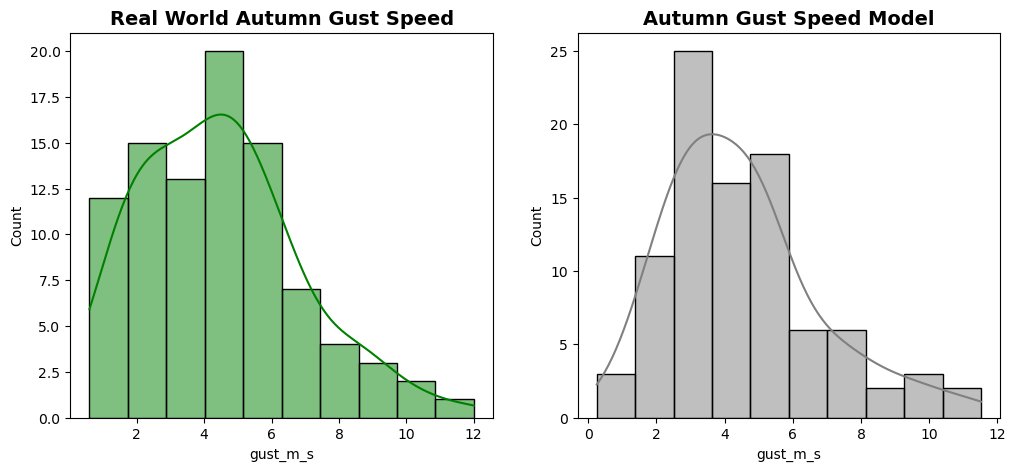

In [50]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(autumn['gust_m_s'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Autumn Gust Speed', color='black', size=14, weight='bold')
sns.histplot(autumn_gust_speed_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Autumn Gust Speed Model', color='black', size=14, weight='bold')
ax2.set(xlabel='gust_m_s')

plt.show()

### Humidity <a id="humidity"></a>

Literature suggests that the normal distribution is the best fit distribution for relative humidity probability modelling (Musa Esıt, 2022). In a study on Turkish weather station data Musa Esıt (2022) found that the normal distribution was the best probability fit for two out of the three weather stations humidity data in the study.

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The standard distribution characteristic bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within two standard deviations of the mean.

**Standard Probability Distribution** - By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713

![Normal Distribution Curve](images/illustrations/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

In mathematical terms the normal distribution probability density function is expressed as:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

The python syntax for the Gaussian distribution is:

`random.normal(loc=0.0, scale=1.0, size=None)`

- loc = mean of the distribution
- scale = standard deviation of the distribution
- size = output shape

A function can be created to return the probability density curve (PDF) for the normal distribution using the desired the mean and standard deviation parameters .

In [51]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

The PDF for the data can then be plotting against the raonge of values. The following lines of code use the the minimum, maximum anbd the number of values for the x-axis values to plot the PDF against.

In [52]:
winter_humidity_xl = np.linspace(winter.describe()['humidity_%']['min'], winter.describe()['humidity_%']['max'], winter_rows)
spring_humidity_xl = np.linspace(spring.describe()['humidity_%']['min'], spring.describe()['humidity_%']['max'], spring_rows)
summer_humidity_xl = np.linspace(summer.describe()['humidity_%']['min'], summer.describe()['humidity_%']['max'], summer_rows)
autumn_humidity_xl = np.linspace(autumn.describe()['humidity_%']['min'], autumn.describe()['humidity_%']['max'], autumn_rows)

Define seasonal humidity variables and pass all required parameters to the PDF function.

In [53]:
norm_winter_humidity_pdf = normal_dist(winter_humidity_xl, winter.describe()['humidity_%']['mean'], winter.describe()['humidity_%']['std'])
norm_spring_humidity_pdf = normal_dist(spring_humidity_xl, spring.describe()['humidity_%']['mean'], spring.describe()['humidity_%']['std'])
norm_summer_humidity_pdf = normal_dist(summer_humidity_xl, summer.describe()['humidity_%']['mean'], summer.describe()['humidity_%']['std'])
norm_autumn_humidity_pdf = normal_dist(autumn_humidity_xl, autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'])

Plotting the results demonstrates that, apart from possibly the summer humidity data, that standard distribution is not a good probability distribution fit to the real world humidity data in the dataset.

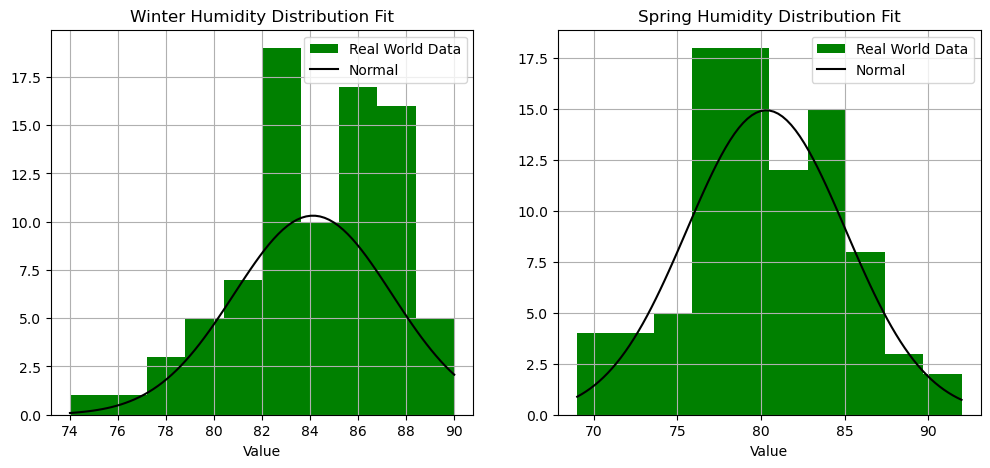

In [54]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF
axe[0].hist(winter['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0].plot(winter_humidity_xl, norm_winter_humidity_pdf, label="Normal", color='black')
axe[0].set_title("Winter Humidity Distribution Fit")
axe[0].set_xlabel("Value")
axe[0].legend()
axe[0].grid()
axe[1].hist(spring['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1].plot(spring_humidity_xl, norm_spring_humidity_pdf, label="Normal", color='black')
axe[1].set_title("Spring Humidity Distribution Fit")
axe[1].set_xlabel("Value")
axe[1].legend()
axe[1].grid()


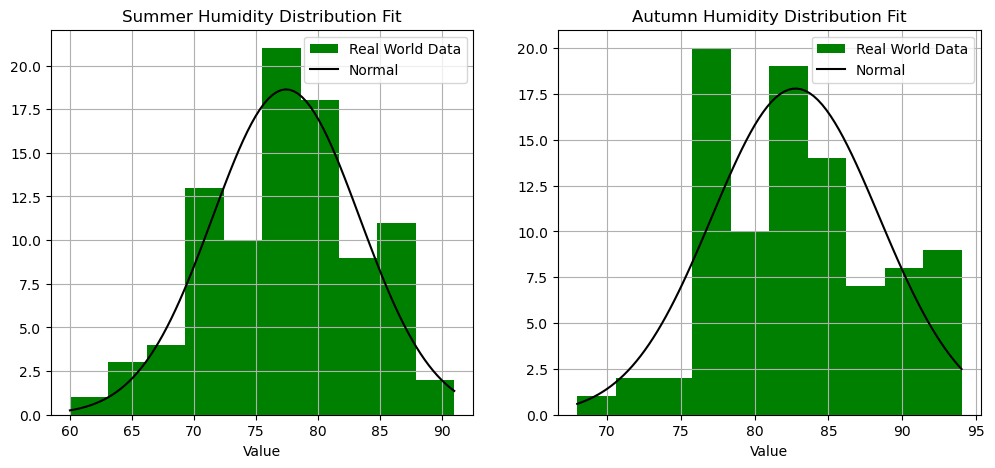

In [55]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions and PDF
axe[0].hist(summer['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0].plot(summer_humidity_xl, norm_summer_humidity_pdf, label="Normal", color='black')
axe[0].set_title("Summer Humidity Distribution Fit")
axe[0].set_xlabel("Value")
axe[0].legend()
axe[0].grid()
axe[1].hist(autumn['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1].plot(autumn_humidity_xl, norm_autumn_humidity_pdf, label="Normal", color='black')
axe[1].set_title("Autumn Humidity Distribution Fit")
axe[1].set_xlabel("Value")
axe[1].legend()
axe[1].grid()


Using SciPy the best fit model can be found.

In [56]:
no_exp_get_best_distribution(winter['humidity_%'])

Best fitting distribution: gumbel_l
Best p value: 0.10871562615053382
Parameters for the best fit: (85.66341062368984, 2.737922584354145)


In [57]:
get_best_distribution(spring['humidity_%'])

Best fitting distribution: gamma
Best p value: 0.7027970081653195
Parameters for the best fit: (862.9329696196596, -58.94536431506131, 0.16138592797931123)


In [58]:
no_exp_get_best_distribution(summer['humidity_%'])

Best fitting distribution: weibull_min
Best p value: 0.8729780297829178
Parameters for the best fit: (5.250976141121197, 50.52367554222906, 29.23180589691651)


In [125]:
no_exp_get_best_distribution(autumn['humidity_%'])

Best fitting distribution: gumbel_r
Best p value: 0.7423408160935218
Parameters for the best fit: (80.03562176522694, 5.223133901010559)


The best fit distribution for the humidity variable are summarised as follows:

| Season    | Variable      |Best Fit Distribution    |
| :-----    | :-------      |:----------              |
| Winter    | humidity_%    | Gumbel Left Skewed      |
| Spring    | humidity_%    | Gamma                   |
| Summer    | humidity_%    | Weibull Minimum         |
| Autumn    | humidity_%    | Gumbel Right Skewed     |

To model the data samples are randomly drawn from the relevant distributions:

In [60]:
from scipy.stats import gumbel_l
from scipy.stats import gumbel_r

# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_humidity_model = gumbel_l.rvs(85.66341062368984, 2.737922584354145, size = winter_rows)
spring_humidity_model = gamma.rvs(862.9329696196596, -58.94536431506131, 0.16138592797931123, size = spring_rows)
summer_humidity_model = weibull_min.rvs(5.250976141121197, 50.52367554222906, 29.23180589691651, size = summer_rows)
autumn_humidity_model = gumbel_r.rvs(80.03562176522694, 5.223133901010559, size = autumn_rows)

For comparative purposes the real world and modelled humidity data is plotted side by side. With the exception of the Autumn data the modelled humidity data is a very close match fot the real world data.

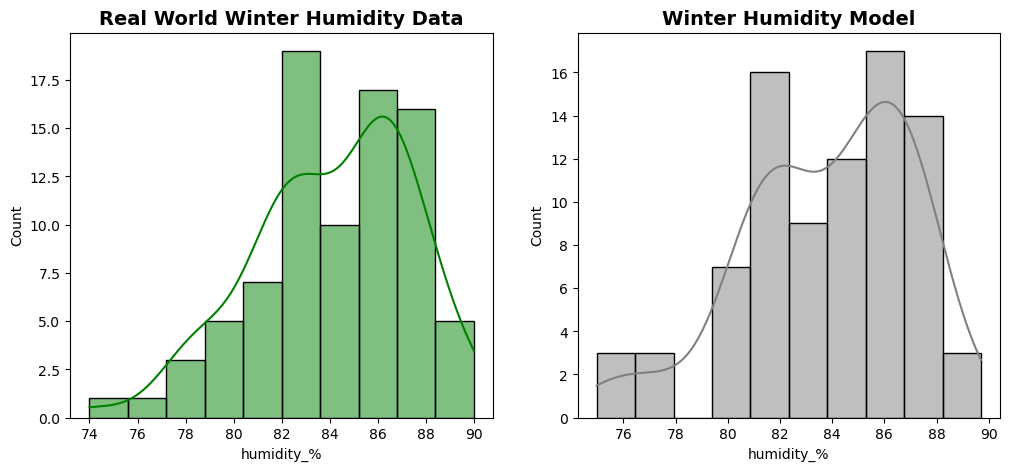

In [61]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(winter['humidity_%'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Winter Humidity Data', color='black', size=14, weight='bold')
sns.histplot(winter_humidity_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Winter Humidity Model', color='black', size=14, weight='bold')
ax2.set(xlabel='humidity_%')

plt.show()

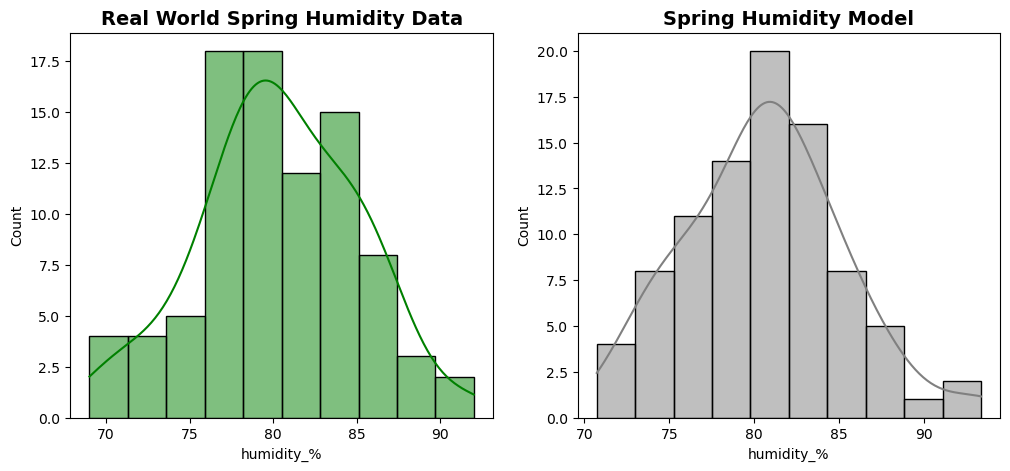

In [62]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(spring['humidity_%'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Spring Humidity Data', color='black', size=14, weight='bold')
sns.histplot(spring_humidity_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Spring Humidity Model', color='black', size=14, weight='bold')
ax2.set(xlabel='humidity_%')

plt.show()

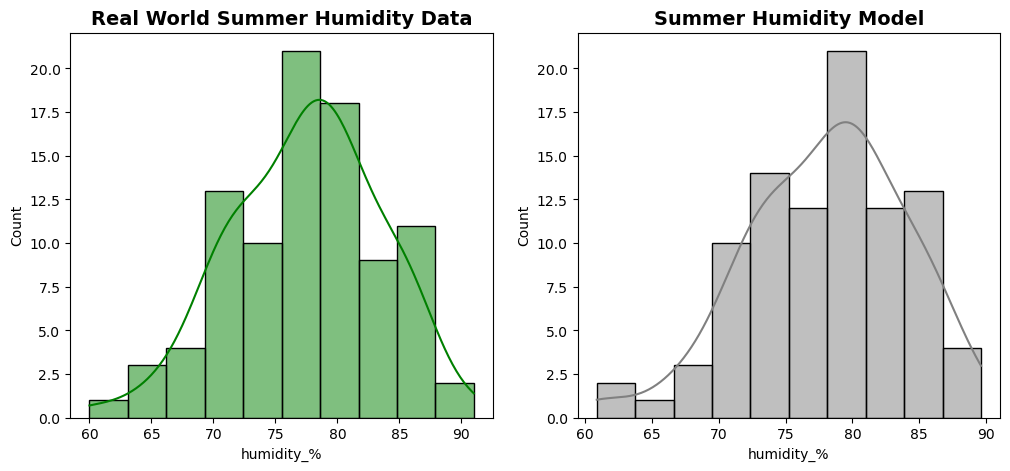

In [63]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(summer['humidity_%'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Summer Humidity Data', color='black', size=14, weight='bold')
sns.histplot(summer_humidity_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Summer Humidity Model', color='black', size=14, weight='bold')
ax2.set(xlabel='humidity_%')

plt.show()

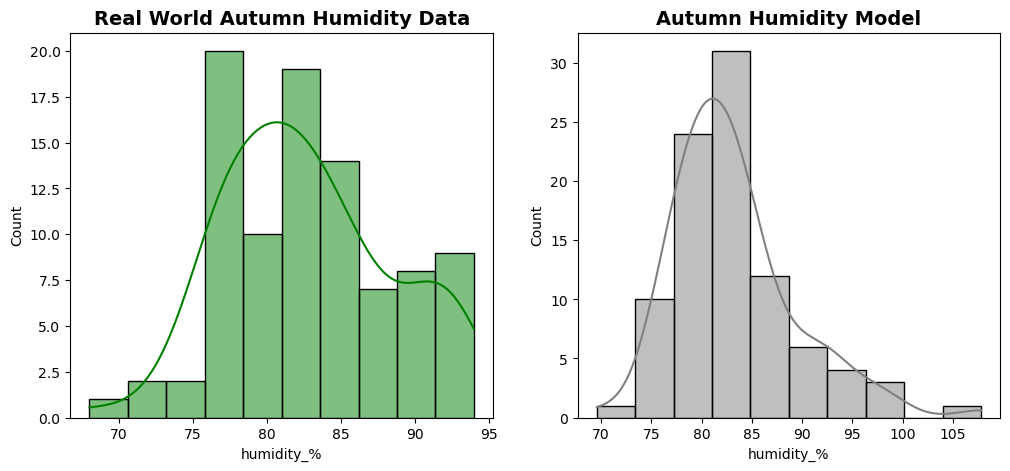

In [64]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(autumn['humidity_%'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Autumn Humidity Data', color='black', size=14, weight='bold')
sns.histplot(autumn_humidity_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Autumn Humidity Model', color='black', size=14, weight='bold')
ax2.set(xlabel='humidity_%')

plt.show()

### Average Wind Chill <a id="average-wind-chill"></a>

No literature was available with respect to wind chill probability modelling. Plotting histograms for the variable allows visualisation of the spread and frequency of the range of values in the chill variable. Inspecting the histograms of the data it could be argued that the distribution appears somewhat normal. However, this is a subjective interpretation.

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

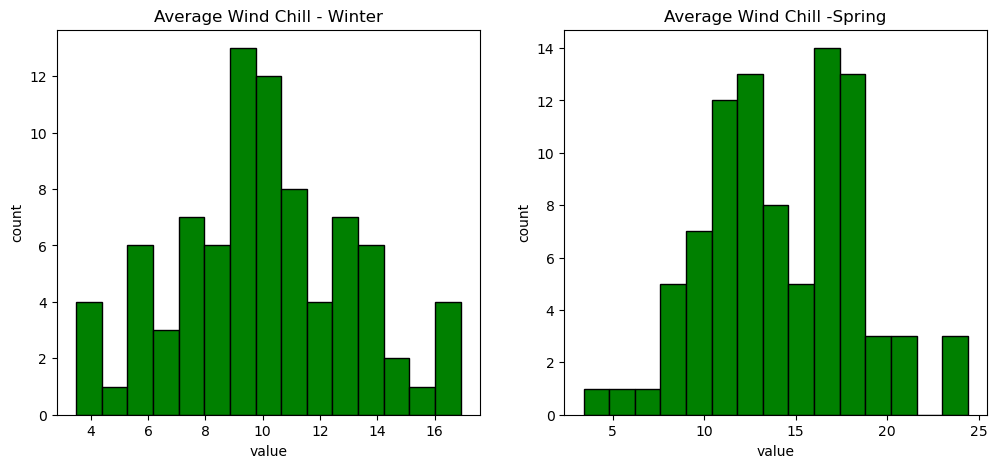

In [65]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(winter['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Average Wind Chill - Winter")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(spring['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Average Wind Chill -Spring")
axe[1].set(xlabel='value', ylabel='count')

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

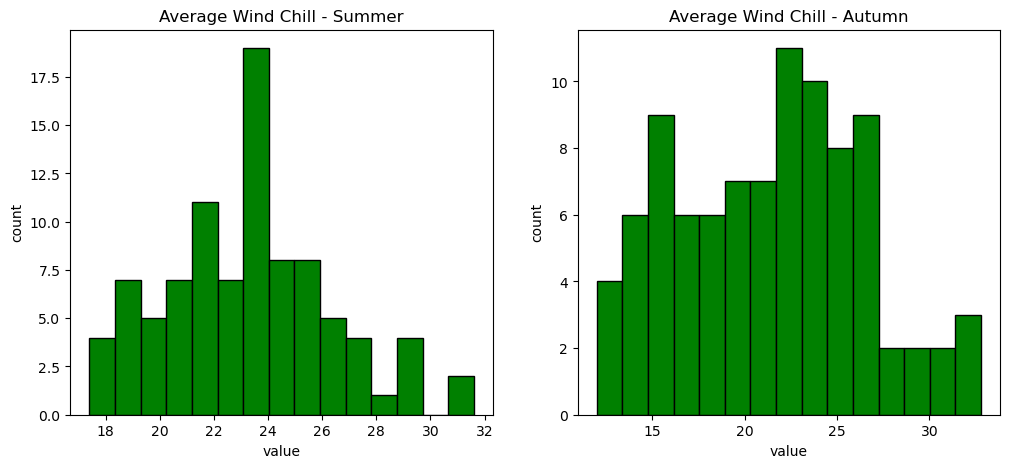

In [66]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(summer['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Average Wind Chill - Summer")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(autumn['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Average Wind Chill - Autumn")
axe[1].set(xlabel='value', ylabel='count')


To asses the best fit probability distribution models in a less subjective way testing the seasonal chill variables using SciPy allows identification of the best fit model.

In [67]:
get_best_distribution(winter['chill_celsius'])

Best fitting distribution: norm
Best p value: 0.9760207947196633
Parameters for the best fit: (10.05595238095238, 3.1464019961762597)


In [68]:
get_best_distribution(spring['chill_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.7050042529648155
Parameters for the best fit: (3.5757587599850313, 1.059060939068513, 14.631938440937914)


In [69]:
no_exp_get_best_distribution(summer['chill_celsius'])

Best fitting distribution: logistic
Best p value: 0.9810279591638167
Parameters for the best fit: (23.150621106400116, 1.7432552219796873)


In [70]:
no_exp_get_best_distribution(autumn['chill_celsius'])

Best fitting distribution: genextreme
Best p value: 0.7998252426034103
Parameters for the best fit: (0.26935763218112546, 19.54692673249385, 4.842580970620443)


The best fit distribution for the chill variable are summarised as follows

| Season    | Variable          |Best Fit Distribution      |
| :-----    | :-------          |:----------                |
| Winter    | chill_celcius     | Normal                    |
| Spring    | chill_celcius     | Weibull Minimum           |
| Summer    | chill_celcius     | Logistic                  |
| Autumn    | chill_celcius     | Generalized Extreme       |

To model the data samples are randomly drawn from the relevant distributions:

In [71]:
from scipy.stats import norm
from scipy.stats import logistic
from scipy.stats import genextreme

# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_chill_model = norm.rvs(10.05595238095238, 3.1464019961762597, size = winter_rows)
spring_chill_model = weibull_min.rvs(3.5757587599850313, 1.059060939068513, 14.631938440937914, size = spring_rows)
summer_chill_model = logistic.rvs(23.150621106400116, 1.7432552219796873, size = summer_rows)
autumn_chill_model = genextreme.rvs(0.26935763218112546, 19.54692673249385, 4.842580970620443, size = autumn_rows)

Plotting the real world and modelled data side by side allows for a visual comparison to be made of the datasets to understand how closely they match.

There is a broader range of values for the winter wind chill modelled data. Apart form that the winter modelled data resembles the real world data.

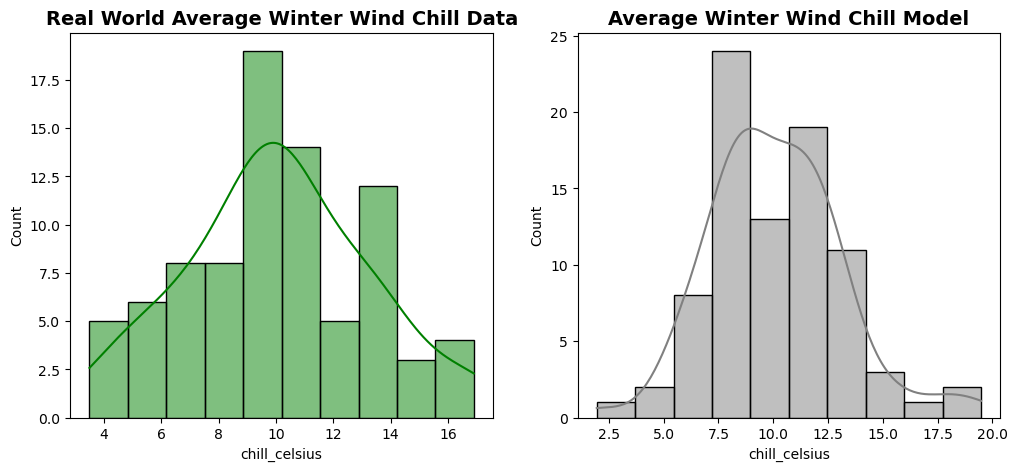

In [72]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(winter['chill_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Winter Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(winter_chill_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Average Winter Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

The spring real world and modelled data for the wind chill differ in so far as the range of values in the synthesised data is slightly smaller. In the real world dataset more values are concentrated in the lower range.

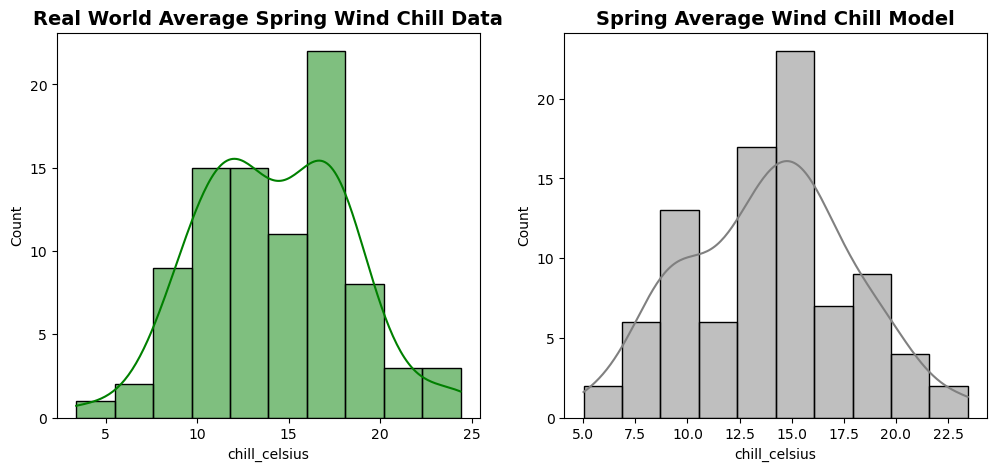

In [73]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(spring['chill_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Spring Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(spring_chill_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Spring Average Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

The modelled summer wind chill data has two peaks in the middle of the range. The range of values differs from the real world data with values occurring lower than 18 degrees. This does not happen in the real world dataset. The shape of the KDE for the two datasets are different likely caused by the two peaks in the modelled data.

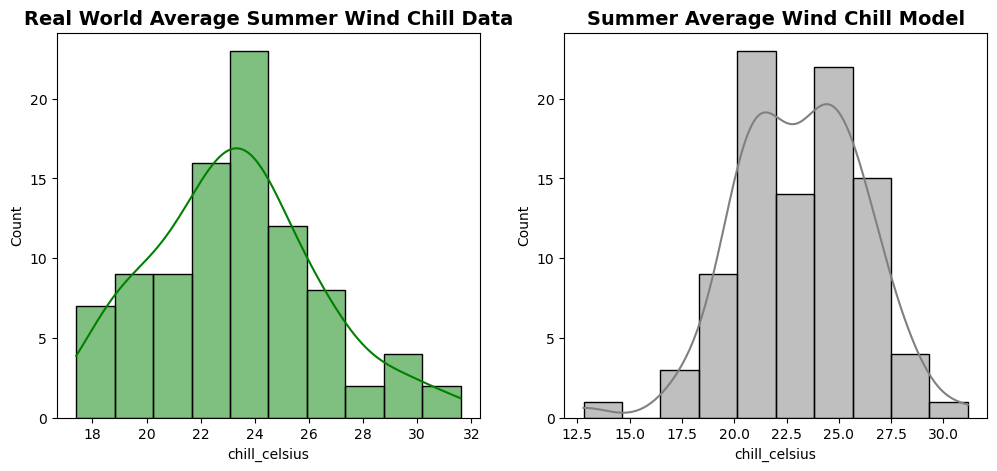

In [74]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(summer['chill_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Summer Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(summer_chill_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Summer Average Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

The autumn wind chill modelled data differs from the real world data because more of the data in the real world dataset is concentrated in the lower values of the range. The appearance of the histogram and KDE for the modelled data appears closer to the characteristic "normal" bell curve than the real world data.

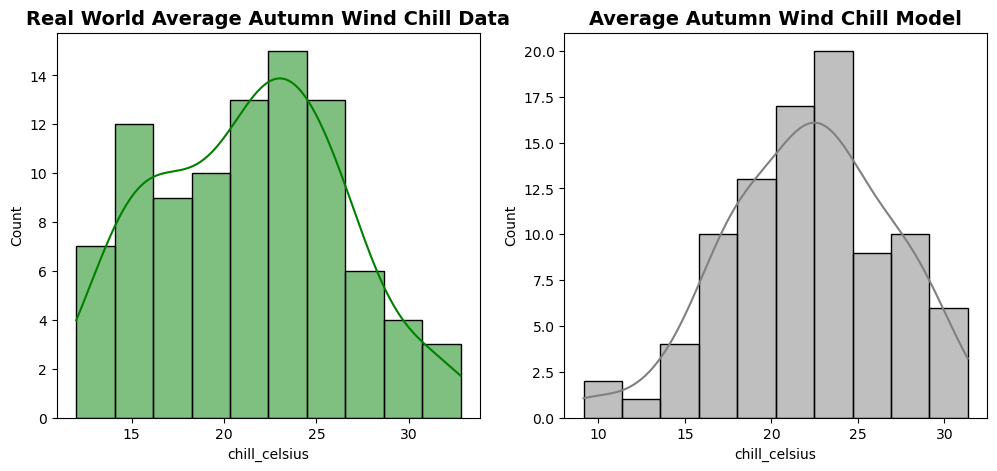

In [75]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(autumn['chill_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Autumn Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(autumn_chill_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Average Autumn Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

### Wind Chill Minimum <a id="wind-chill-minimum"></a>

Visualising histograms of the minimum wind chill allows a subjective assessment of the variable. Once again the argument could be made for a standard distribution model based on the plotted histograms.

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

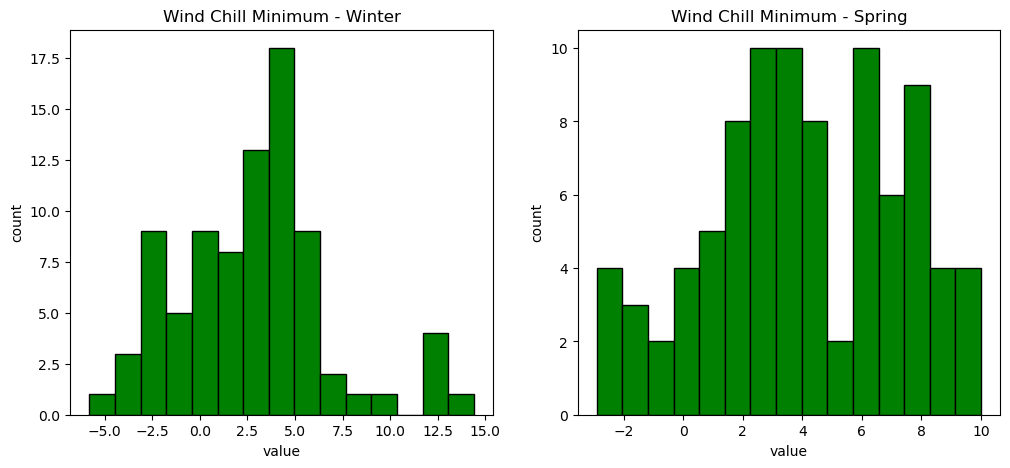

In [76]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(winter['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Wind Chill Minimum - Winter")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(spring['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Wind Chill Minimum - Spring")
axe[1].set(xlabel='value', ylabel='count')

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

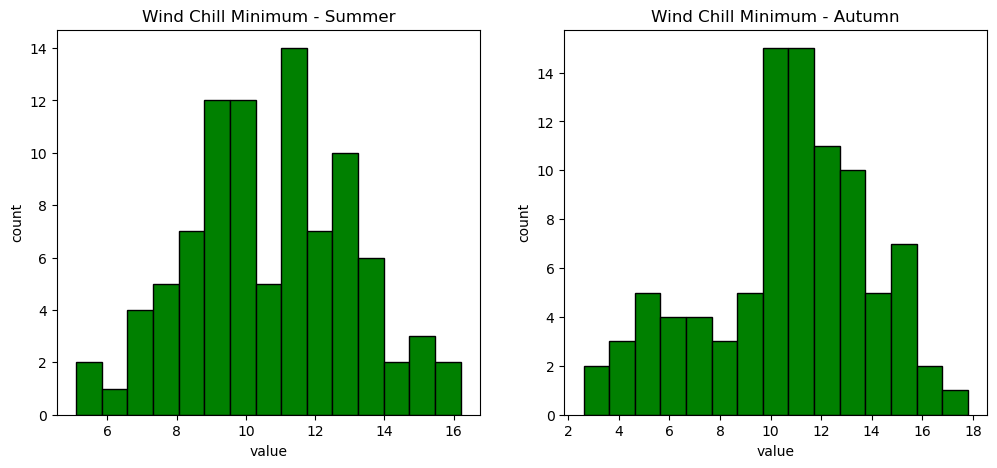

In [77]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(summer['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Wind Chill Minimum - Summer")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(autumn['chill_minimum_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Wind Chill Minimum - Autumn")
axe[1].set(xlabel='value', ylabel='count')

Applying a more scientific approach enables a better model fit for synthesis of the data set.

In [78]:
no_exp_get_best_distribution(winter['chill_minimum_celsius'])

/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Best fitting distribution: logistic
Best p value: 0.40253408974507665
Parameters for the best fit: (2.6735565945646425, 2.1747710735374812)


In [79]:
get_best_distribution(spring['chill_minimum_celsius'])

Best fitting distribution: weibull_max
Best p value: 0.700313297496614
Parameters for the best fit: (2.348839650050402, 11.19975583298257, 8.050467720787555)


In [80]:
get_best_distribution(summer['chill_minimum_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.904918219976505
Parameters for the best fit: (3.2237987617706425, 3.687447192297376, 7.819346742644834)


In [81]:
get_best_distribution(autumn['chill_minimum_celsius'])

Best fitting distribution: gumbel_l
Best p value: 0.9000329660562728
Parameters for the best fit: (12.295212077101862, 2.88175333260874)


The best fit distributions for the minimum chill variable are summarised as follows

| Season    | Variable                  |Best Fit Distribution      |
| :-----    | :-------                  |:----------                |
| Winter    | chill_minimum_celsius     | Logistic                  |
| Spring    | chill_minimum_celsius     | Weibull Maximum           |
| Summer    | chill_minimum_celsius     | Weibull Minimum           |
| Autumn    | chill_minimum_celsius     | Gumbel Left Skewed        |

To model the data samples are randomly drawn from the relevant distributions:

In [82]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_chill_minimum_model = logistic.rvs(2.6735565945646425, 2.1747710735374812, size = winter_rows)
spring_chill_minimum_model = weibull_max.rvs(2.348839650050402, 11.19975583298257, 8.050467720787555, size = spring_rows)
summer_chill_minimum_model = weibull_min.rvs(3.2237987617706425, 3.687447192297376, 7.819346742644834, size = summer_rows)
autumn_chill_minimum_model = gumbel_l.rvs(12.295212077101862, 2.88175333260874, size = autumn_rows)

The range of values for the real world and modelled datasets for the winter minimum wind chill data are close to each other. The concentration of vlaues in the moddle of the range in the modelled dataset is more uniform than the real world data.

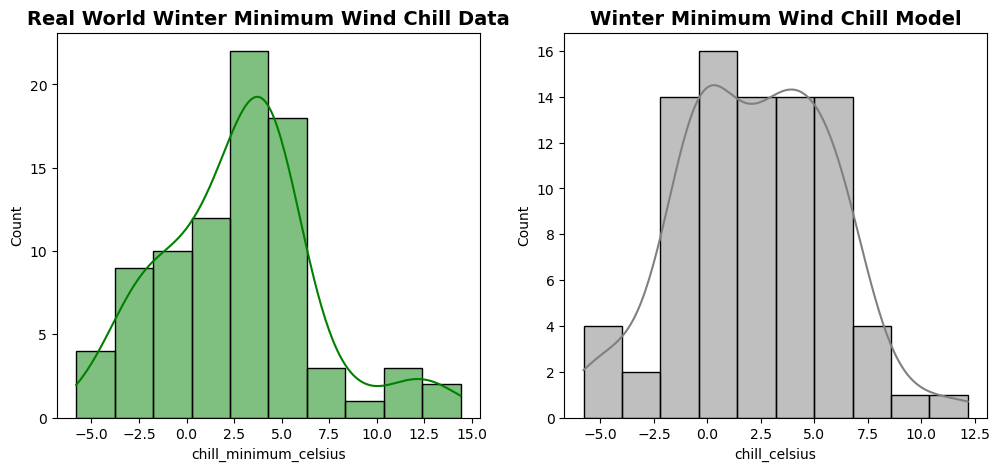

In [83]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(winter['chill_minimum_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Winter Minimum Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(winter_chill_minimum_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Winter Minimum Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

The range of values in the modelled dataset for the spring minimum wind chill data differs from the real world. However, the distribution of the data points from minus two degrees appears broadly similar.

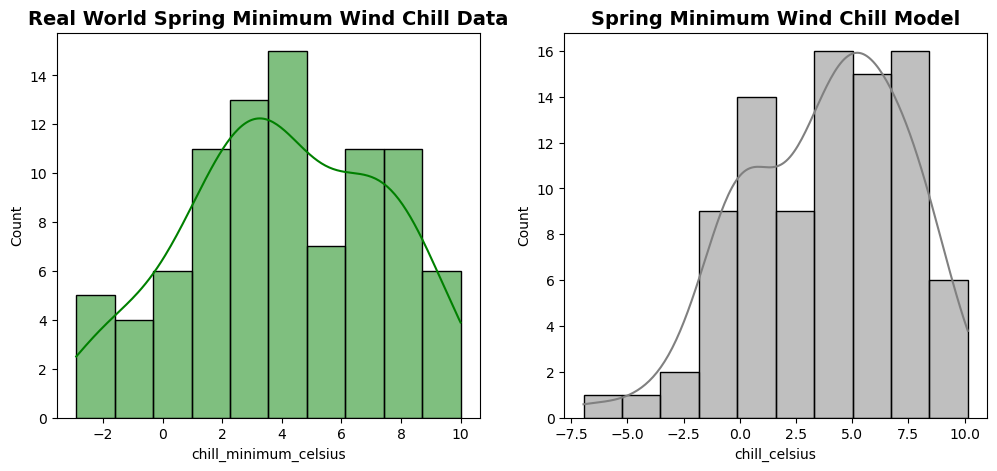

In [84]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(spring['chill_minimum_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Spring Minimum Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(spring_chill_minimum_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Spring Minimum Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

The summer minimum wind chill models and real world data do differ slightly, however the range and distribution of data points in the range are close to each other.

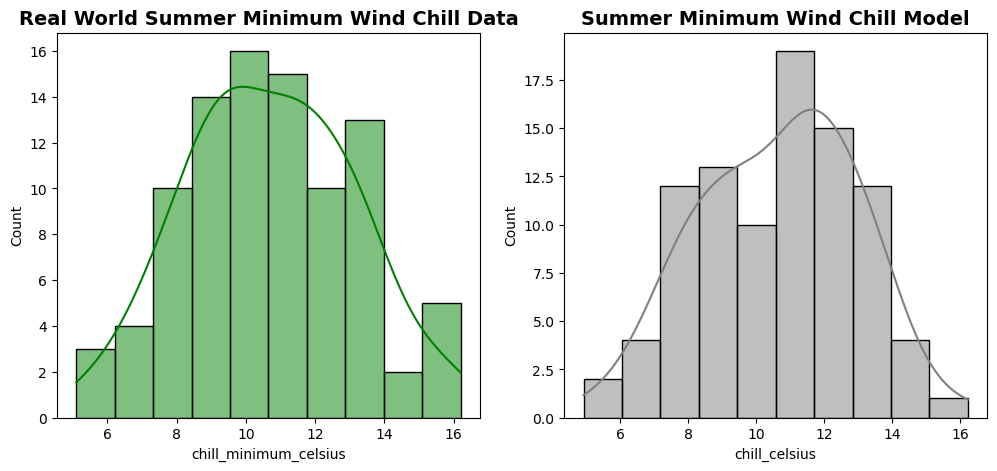

In [85]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(summer['chill_minimum_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Summer Minimum Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(summer_chill_minimum_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Summer Minimum Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

The range of values in the autumn minimum wind chill data set are the same at the upper end of the range, however at the lower end of the range the modelled data set differs from the real world data. More of the values are distributed at the upper end of the range in the autumn wind chill dataset.

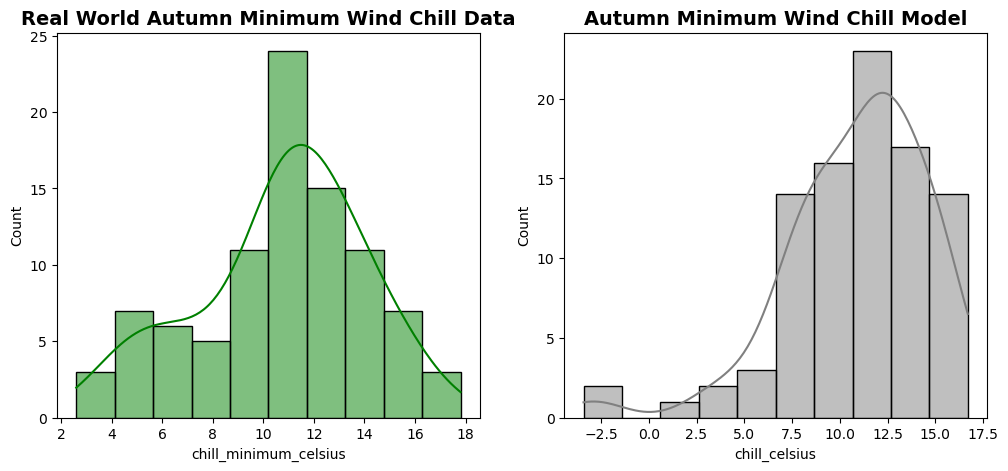

In [86]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(autumn['chill_minimum_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Autumn Minimum Wind Chill Data', color='black', size=14, weight='bold')
sns.histplot(autumn_chill_minimum_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Autumn Minimum Wind Chill Model', color='black', size=14, weight='bold')
ax2.set(xlabel='chill_celsius')

plt.show()

###  Average Daily Temperature <a id="average-daily-temperature"></a>

*Depending on the application, near-surface air temperature can often be modeled quite satisfactorily with a normal distribution.* (Gubler, Fukutome and Scherrer, 2023, p1273.)

This hypothesis can be tested over the next three variables. Firstly a subjective visual assessment can be made of the average air temperature. The resulting histograms would suggest that the distribution is somewhat normal.

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

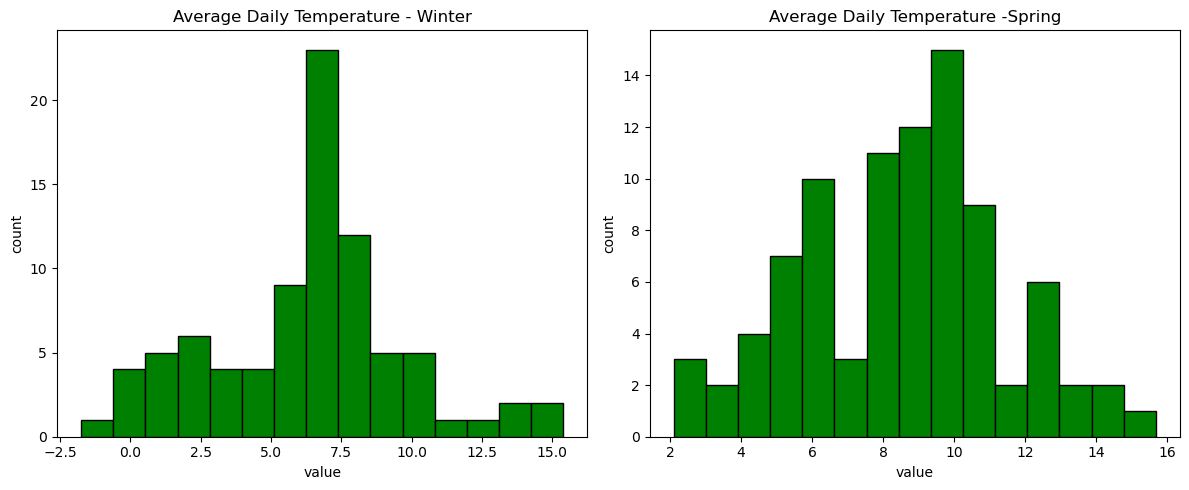

In [126]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(winter['temperature_average_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Average Daily Temperature - Winter")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(spring['temperature_average_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Average Daily Temperature -Spring")
axe[1].set(xlabel='value', ylabel='count')

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

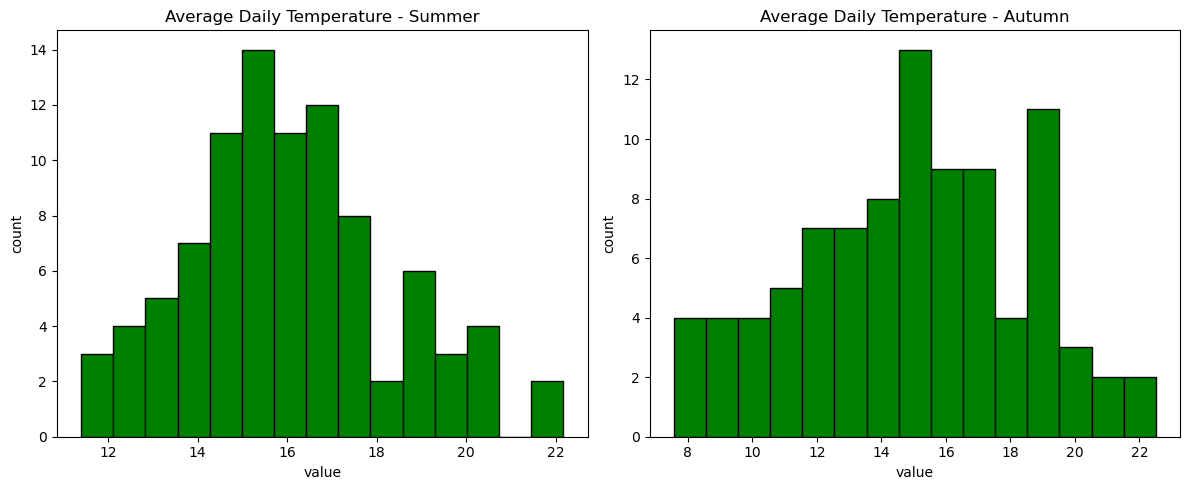

In [127]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(summer['temperature_average_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Average Daily Temperature - Summer")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(autumn['temperature_average_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Average Daily Temperature - Autumn")
axe[1].set(xlabel='value', ylabel='count')

Using SciPy best distribution fit can be selected based on a quantitative value.

In [88]:
get_best_distribution(winter['temperature_average_celsius'])

/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:2008: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Best fitting distribution: logistic
Best p value: 0.416808075341362
Parameters for the best fit: (6.418678601663778, 1.9112182450048845)


In [89]:
get_best_distribution(spring['temperature_average_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.6321904225234456
Parameters for the best fit: (3.7810028398697098, -1.0303503130030247, 10.570625500017709)


In [90]:
get_best_distribution(summer['temperature_average_celsius'])

Best fitting distribution: lognorm
Best p value: 0.9625247516896018
Parameters for the best fit: (0.16346562896194716, 2.1703665343890726, 13.652109989434779)


In [91]:
get_best_distribution(autumn['temperature_average_celsius'])

Best fitting distribution: genextreme
Best p value: 0.988371122965615
Parameters for the best fit: (0.3536834279659122, 13.850224336548242, 3.5918601642736365)


The best fir distributions can be summarised:

| Season    | Variable                       |Best Fit Distribution      |
| :-----    | :-------                       |:----------                |
| Winter    | temperature_average_celsius    | Logistic                  |
| Spring    | temperature_average_celsius    | Weibull Minimum           |
| Summer    | temperature_average_celsius    | Log Normal                |
| Autumn    | temperature_average_celsius    | Generalised Extreme       |

Variables can then be defined to model datasets with the best fit distributions.

In [92]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_temperature_average_model = logistic.rvs(6.418678601663778, 1.9112182450048845, size = winter_rows)
spring_temperature_average_model = weibull_min.rvs(3.7810028398697098, -1.0303503130030247, 10.570625500017709, size = spring_rows)
summer_temperature_average_model = lognorm.rvs(0.16346562896194716, 2.1703665343890726, 13.652109989434779, size = summer_rows)
autumn_temperature_average_model = genextreme.rvs(0.3536834279659122, 13.850224336548242, 3.5918601642736365, size = autumn_rows)

To subjectively compare the real world data and the synthesised data each dataset is visualised side by side.

The range of values mirror each other between the real world and modelled average winter daily temperature. However, the distribution is more uniform in the average daily temperature model.

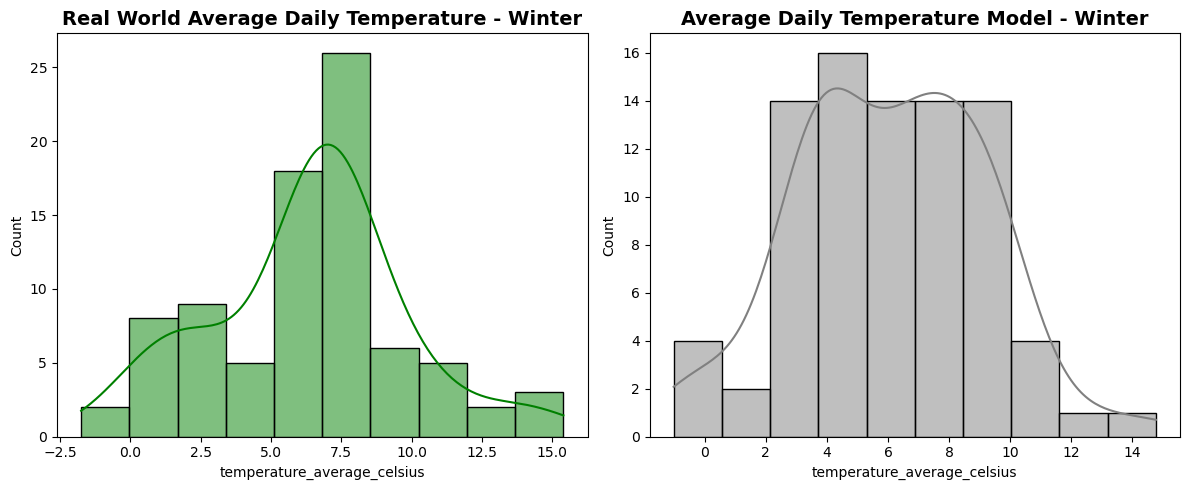

In [138]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(winter['temperature_average_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Daily Temperature - Winter', color='black', size=14, weight='bold')
sns.histplot(winter_temperature_average_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Average Daily Temperature Model - Winter', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

plt.show()

The ranges are similar for the real world and modelled average daily temperature in spring. The data in the modelled dataset is distributed more evenly compared to the real world world dataset.

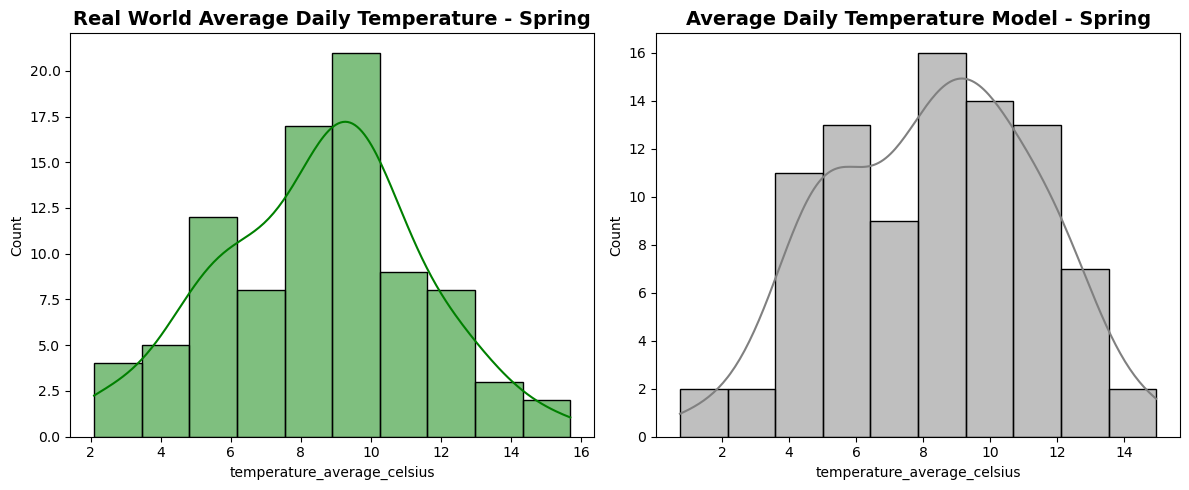

In [132]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(spring['temperature_average_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Daily Temperature - Spring', color='black', size=14, weight='bold')
sns.histplot(spring_temperature_average_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Average Daily Temperature Model - Spring', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

plt.show()

The average daily temperature summer model and real wolrd data are very close to each other both in range and how the data is distributed in the range.

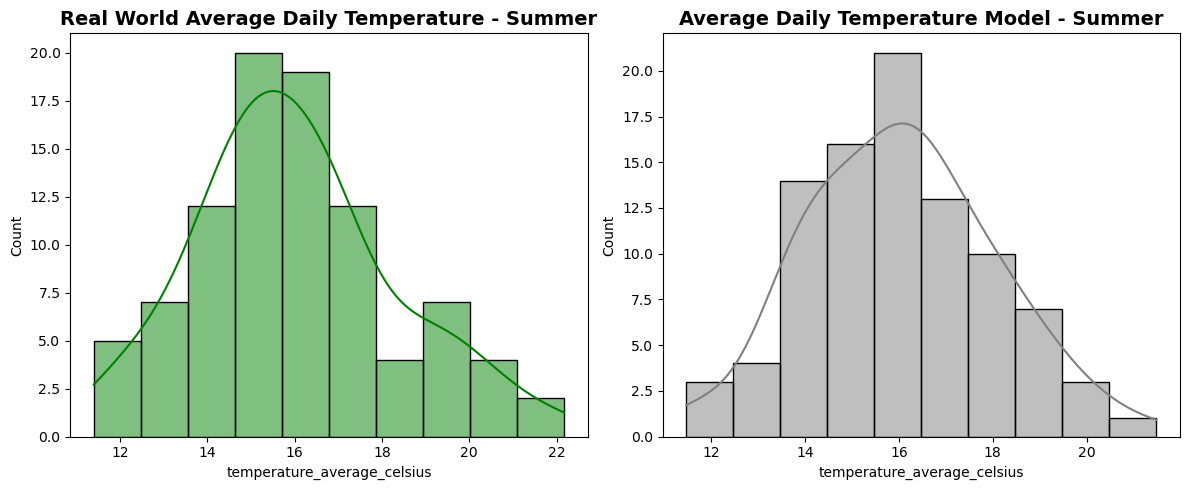

In [133]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(summer['temperature_average_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Daily Temperature - Summer', color='black', size=14, weight='bold')
sns.histplot(summer_temperature_average_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Average Daily Temperature Model - Summer', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

plt.show()

The autumnal average daily temperature real world data and the modelled data are similar. Subjectively it appears as if the real data is more uniformly spread when compared to the spread of the modelled data with arrpears to be mo. The modelled data appears cloer to a standard spread than the real world datas

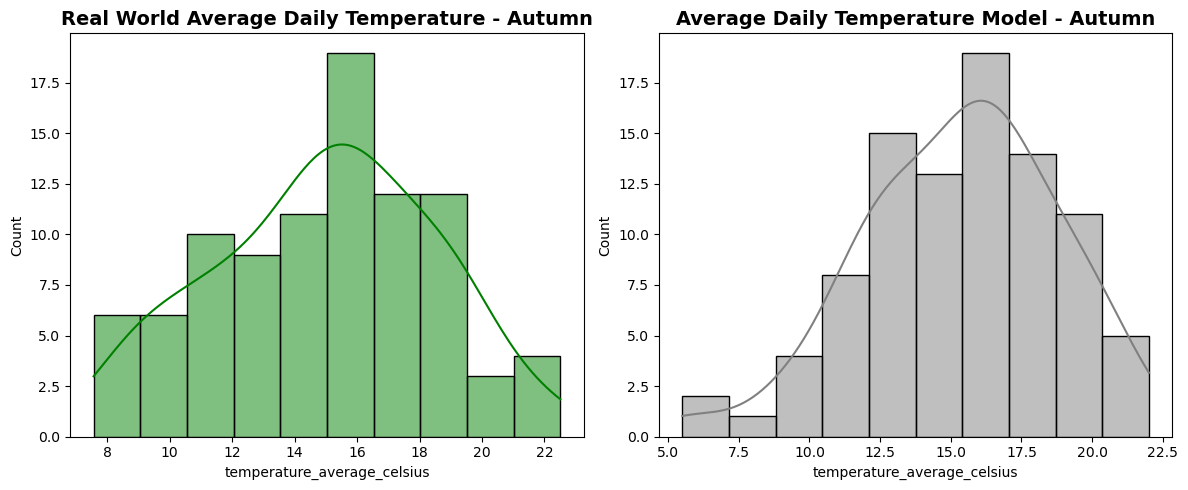

In [137]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(autumn['temperature_average_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Average Daily Temperature - Autumn', color='black', size=14, weight='bold')
sns.histplot(autumn_temperature_average_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Average Daily Temperature Model - Autumn', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

plt.show()

### Daily Temperature Low <a id="daily-temperature-low"></a>

array([<Axes: title={'center': 'Daily Low Temperature - Winter'}, xlabel='value', ylabel='count'>,
       <Axes: title={'center': 'Daily Low Temperature -Spring'}, xlabel='value', ylabel='count'>],
      dtype=object)

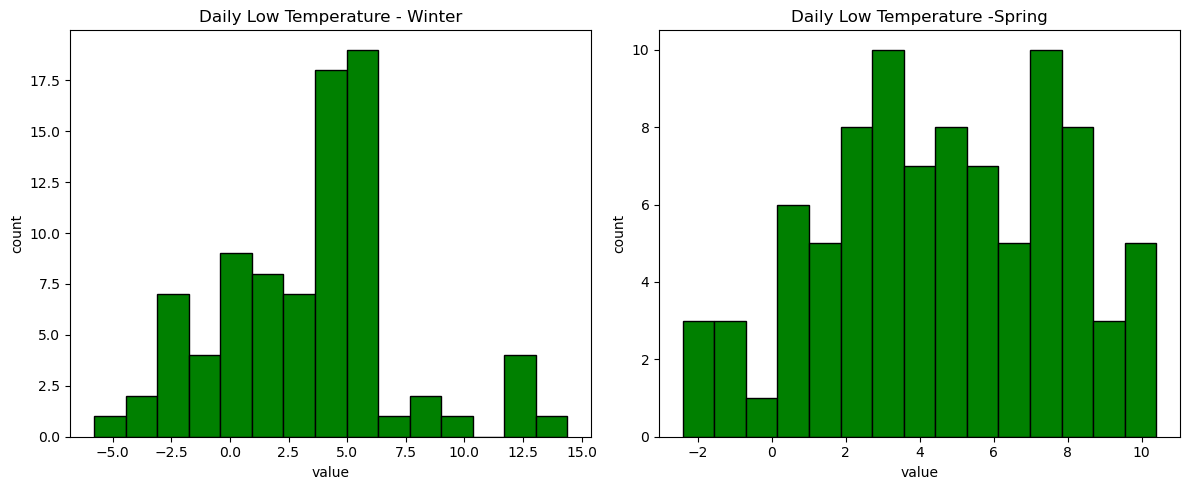

In [139]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(winter['temperature_range_low_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Daily Low Temperature - Winter")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(spring['temperature_range_low_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Daily Low Temperature -Spring")
axe[1].set(xlabel='value', ylabel='count')
axe

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

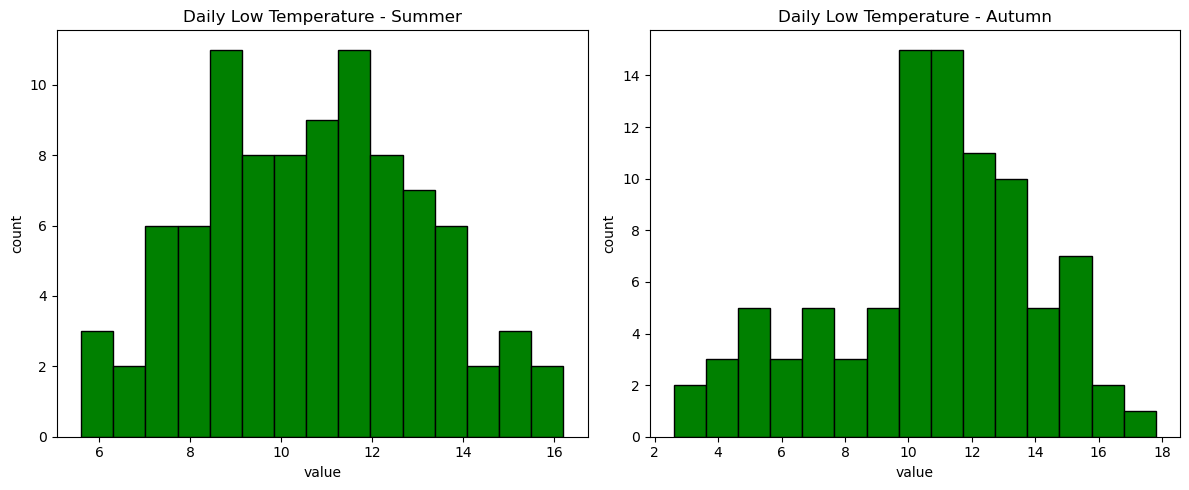

In [140]:
# Create an empty plot.
fig, axe = plt.subplots(1, 2, figsize=(12,5))

# plot the distributions
axe[0].hist(summer['temperature_range_low_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[0].set_title("Daily Low Temperature - Summer")
axe[0].set(xlabel='value', ylabel='count')
axe[1].hist(autumn['temperature_range_low_celsius'], color = 'green', edgecolor = 'black', bins=15)
axe[1].set_title("Daily Low Temperature - Autumn")
axe[1].set(xlabel='value', ylabel='count')

Assorted models are tested for fit:

In [94]:
get_best_distribution(winter['temperature_range_low_celsius'])

Best fitting distribution: logistic
Best p value: 0.21843622747517882
Parameters for the best fit: (3.337545714785988, 2.1451791855753344)


In [95]:
get_best_distribution(spring['temperature_range_low_celsius'])

Best fitting distribution: genextreme
Best p value: 0.8125893885387296
Parameters for the best fit: (0.4385897712927153, 3.663294683883902, 3.3556264275099954)


In [96]:
get_best_distribution(summer['temperature_range_low_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.9701187070782884
Parameters for the best fit: (3.009300219737904, 4.165594591411083, 7.3323319495466475)


In [97]:
get_best_distribution(autumn['temperature_range_low_celsius'])

Best fitting distribution: gumbel_l
Best p value: 0.9159332968970124
Parameters for the best fit: (12.32558845597339, 2.863023118552268)


The best fit distributions can be summarised:

| Season    | Variable                       |Best Fit Distribution      |
| :-----    | :-------                       |:----------                |
| Winter    | temperature_range_low_celsius  | Logistic                  |
| Spring    | temperature_range_low_celsius  | Generalised Extreme       |
| Summer    | temperature_range_low_celsius  | Weibull Min               |
| Autumn    | temperature_range_low_celsius  | Gumbel Left Skewed        |

Variables can then be defined to model datasets with the best fit distributions.

In [98]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_temperature_low_model = logistic.rvs(3.337545714785988, 2.1451791855753344, size = winter_rows)
spring_temperature_low_model = genextreme.rvs(0.4385897712927153, 3.663294683883902, 3.3556264275099954, size = spring_rows)
summer_temperature_low_model = weibull_min.rvs(3.009300219737904, 4.165594591411083, 7.3323319495466475, size = summer_rows)
autumn_temperature_low_model = gumbel_l.rvs(12.32558845597339, 2.863023118552268, size = autumn_rows)

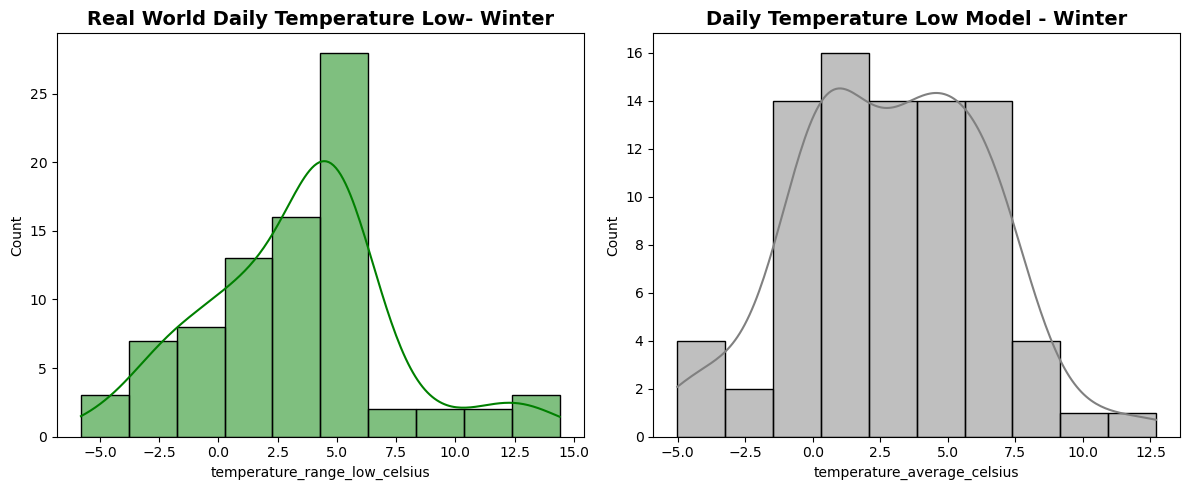

In [141]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(winter['temperature_range_low_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Daily Temperature Low- Winter', color='black', size=14, weight='bold')
sns.histplot(winter_temperature_low_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Daily Temperature Low Model - Winter', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

plt.show()

[Text(0.5, 0, 'temperature_average_celsius')]

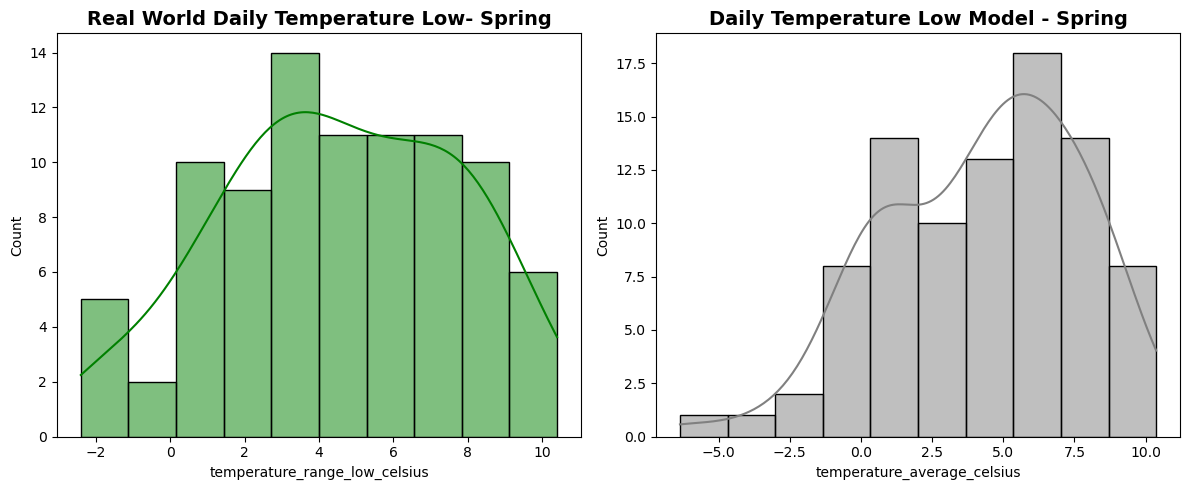

In [142]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(spring['temperature_range_low_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Daily Temperature Low- Spring', color='black', size=14, weight='bold')
sns.histplot(spring_temperature_low_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Daily Temperature Low Model - Spring', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

[Text(0.5, 0, 'temperature_average_celsius')]

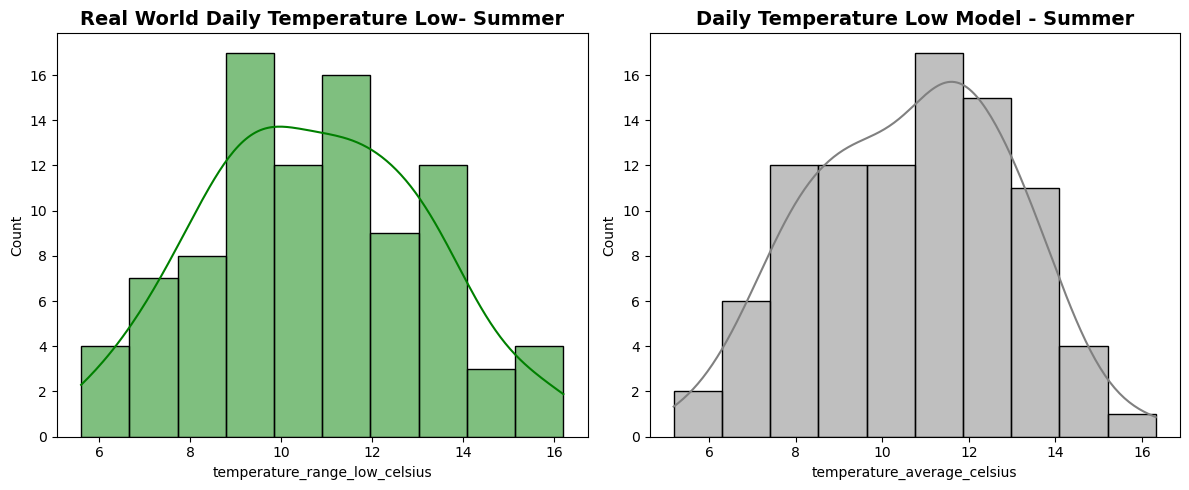

In [143]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(summer['temperature_range_low_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Daily Temperature Low- Summer', color='black', size=14, weight='bold')
sns.histplot(summer_temperature_low_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Daily Temperature Low Model - Summer', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

[Text(0.5, 0, 'temperature_average_celsius')]

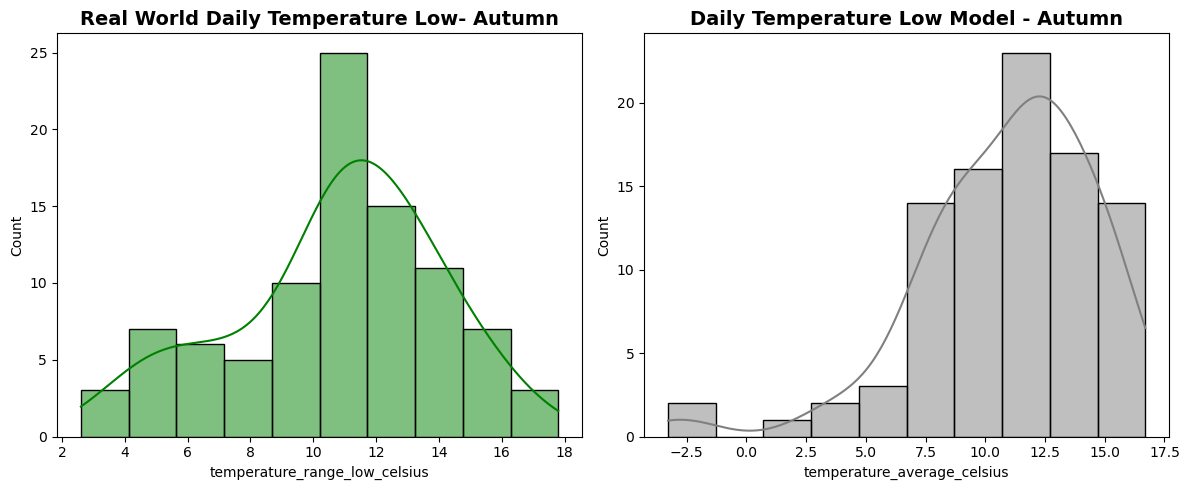

In [144]:
# Create an empty plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(autumn['temperature_range_low_celsius'], color='green', kde=True, ax=ax1, bins=10).set_title('Real World Daily Temperature Low- Autumn', color='black', size=14, weight='bold')
sns.histplot(autumn_temperature_low_model, color='grey', kde=True, ax=ax2, bins=10).set_title('Daily Temperature Low Model - Autumn', color='black', size=14, weight='bold')
ax2.set(xlabel='temperature_average_celsius')

### Daily Temperature High <a id="daily-temperature-high"></a>

Visual inspection of histograms for the Temperature High variable allows a subjective impression of the spread of the data. The winter, spring and summer plots appear to have a normal distribution while the autumn plot appears more uniform.

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

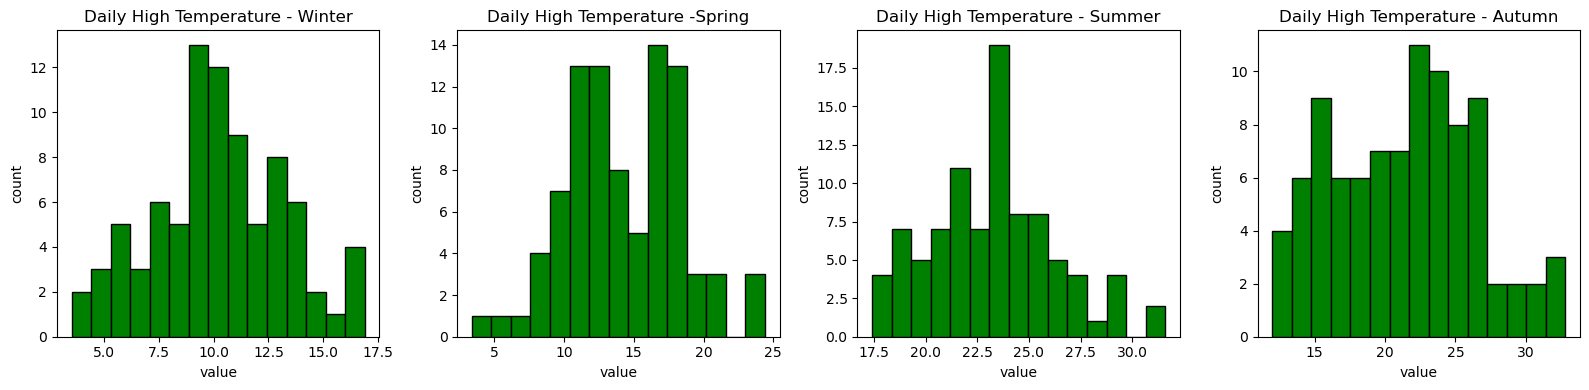

In [99]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['temperature_range_high_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Daily High Temperature - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['temperature_range_high_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Daily High Temperature -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer['temperature_range_high_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Daily High Temperature - Summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['temperature_range_high_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Daily High Temperature - Autumn")
axis[3].set(xlabel='value', ylabel='count')


In [100]:
get_best_distribution(winter['temperature_range_high_celsius'])

Best fitting distribution: logistic
Best p value: 0.989644757512058
Parameters for the best fit: (10.240075994159673, 1.751969449621479)


In [101]:
get_best_distribution(spring['temperature_range_high_celsius'])

Best fitting distribution: weibull_min
Best p value: 0.7337464917304899
Parameters for the best fit: (3.6257181272612757, 1.0195520829684352, 14.706415544844898)


In [102]:
get_best_distribution(summer['temperature_range_high_celsius'])

Best fitting distribution: logistic
Best p value: 0.9810279591638167
Parameters for the best fit: (23.150621106400116, 1.7432552219796873)


In [103]:
get_best_distribution(autumn['temperature_range_high_celsius'])

Best fitting distribution: genextreme
Best p value: 0.7998252426034103
Parameters for the best fit: (0.26935763218112546, 19.54692673249385, 4.842580970620443)


The best fit distributions can be summarised:

| Season    | Variable                        |Best Fit Distribution      |
| :-----    | :-------                        |:----------                |
| Winter    | temperature_range_high_celsius  | Logistic                  |
| Spring    | temperature_range_high_celsius  | Weibull Min               |
| Summer    | temperature_range_high_celsius  | Logistic                  |
| Autumn    | temperature_range_high_celsius  | Generalised Extreme       |

Variables can then be defined to model datasets with the best fit distributions.

In [104]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_temperature_high_model = logistic.rvs(10.240075994159673, 1.751969449621479, size = winter_rows)
spring_temperature_high_model = weibull_min.rvs(3.6257181272612757, 1.0195520829684352, 14.706415544844898, size = spring_rows)
summer_temperature_high_model = logistic.rvs(23.150621106400116, 1.7432552219796873, size = summer_rows)
autumn_temperature_high_model = genextreme.rvs(0.26935763218112546, 19.54692673249385, 4.842580970620443, size = autumn_rows)

### Air Pressure <a id="air-pressure"></a>

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

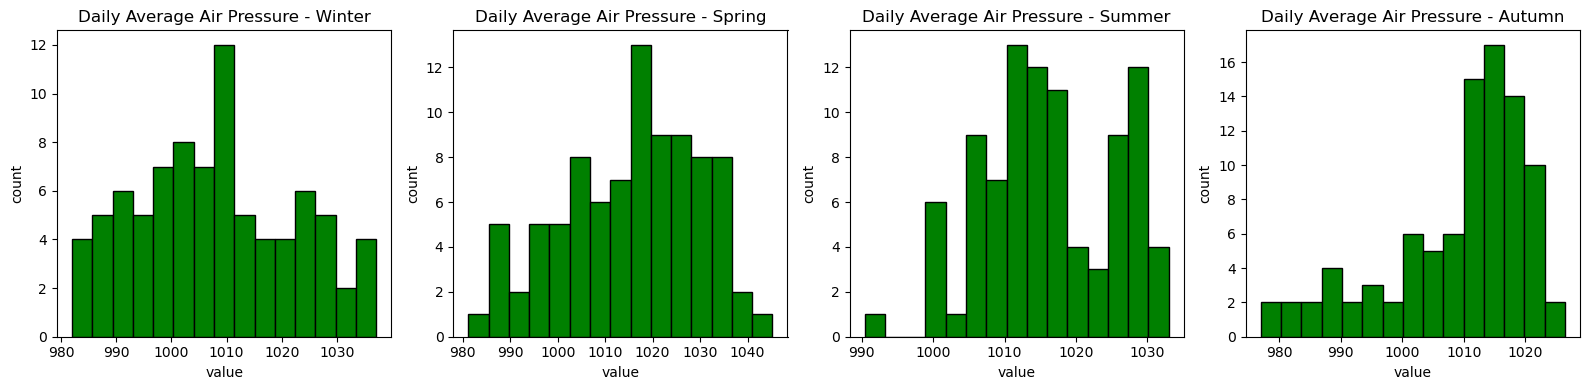

In [105]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['outside_air_pres_hPa'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Daily Average Air Pressure - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['outside_air_pres_hPa'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Daily Average Air Pressure - Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer['outside_air_pres_hPa'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Daily Average Air Pressure - Summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['outside_air_pres_hPa'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Daily Average Air Pressure - Autumn")
axis[3].set(xlabel='value', ylabel='count')


In [106]:
get_best_distribution(winter['outside_air_pres_hPa'])

Best fitting distribution: rayleigh
Best p value: 0.8935604687244418
Parameters for the best fit: (980.1456455090256, 22.117017317568596)


In [107]:
get_best_distribution(spring['outside_air_pres_hPa'])

Best fitting distribution: weibull_min
Best p value: 0.9914324665954188
Parameters for the best fit: (5.7014626206626104, 945.6272948872662, 75.38640628785643)


In [108]:
get_best_distribution(summer['outside_air_pres_hPa'])

Best fitting distribution: genextreme
Best p value: 0.43531332590164273
Parameters for the best fit: (0.4147771773388972, 1013.410914411412, 9.653013103983202)


In [109]:
get_best_distribution(autumn['outside_air_pres_hPa'])

Best fitting distribution: weibull_min
Best p value: 0.182400459700282
Parameters for the best fit: (292585119.90938723, -2360009745.1892443, 2360010759.209868)


The best fit distributions can be summarised:

| Season    | Variable              |Best Fit Distribution      |
| :-----    | :-------              |:----------                |
| Winter    | outside_air_pres_hPa  | Rayleigh                  |
| Spring    | outside_air_pres_hPa  | Weibull Min               |
| Summer    | outside_air_pres_hPa  | Generalised Extreme       |
| Autumn    | outside_air_pres_hPa  | Weibull Min               |

Variables can then be defined to model datasets with the best fit distributions.

In [110]:
# seeding so the data doesn't change on run of code
np.random.seed(seed=233423)

winter_air_pressure_high_model = rayleigh.rvs(980.1456455090256, 22.117017317568596, size = winter_rows)
spring_air_pressure_high_model = weibull_min.rvs(5.7014626206626104, 945.6272948872662, 75.38640628785643, size = spring_rows)
summer_air_pressure_high_model = genextreme.rvs(0.4147771773388972, 1013.410914411412, 9.653013103983202, size = summer_rows)
autumn_air_pressure_high_model = weibull_min.rvs(292585119.90938723, -2360009745.1892443, 2360010759.209868, size = autumn_rows)

---

## Synthesised Dataset <a id="synthesised-dataset"></a>

Using the `pd.date_range()` method the time_series from the real world dataset can be created.

In [111]:
# adapted from - https://pandas.pydata.org/docs/reference/api/pandas.date_range.html [Accessed 13 Nov. 2023].
dti = pd.date_range(start="2022-11-09", end='2023-10-31')


A new Pandas DataFrame is created and the generated time series is set as the index.

In [112]:
# Code adapted from - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html [Accessed 13 Nov. 2023].
synthesised_dataset = pd.DataFrame(index=dti, columns = column_rename)

Concatenate the seasonal data for each variable into to one array and assign a variable for the array that corresponds to the modelled variable.

In [113]:
# code adapted from - https://sparkbyexamples.com/python/numpy-concatenate-arrays/ [Accessed 13 Nov. 2023]
wind_speed_model = np.concatenate((winter_wind_speed_model, spring_wind_speed_model, summer_wind_speed_model, autumn_wind_speed_model))
gust_speed_model = np.concatenate((winter_gust_speed_model, spring_gust_speed_model, summer_gust_speed_model, autumn_gust_speed_model))
humidity_model = np.concatenate((winter_humidity_model, spring_humidity_model, summer_humidity_model, autumn_humidity_model))
chill_model = np.concatenate((winter_chill_model, spring_chill_model, summer_chill_model, autumn_chill_model))
chill_min_model = np.concatenate((winter_chill_minimum_model, spring_chill_minimum_model, summer_chill_minimum_model, autumn_chill_minimum_model))
temperature_average_model = np.concatenate((winter_temperature_average_model, spring_temperature_average_model , summer_temperature_average_model , autumn_temperature_average_model)) 
temperature_low_model = np.concatenate((winter_temperature_low_model, spring_temperature_low_model, summer_temperature_low_model, autumn_temperature_low_model))
temperature_high_model = np.concatenate((winter_temperature_high_model, spring_temperature_high_model, summer_temperature_high_model, autumn_temperature_high_model))
air_pressure_model = np.concatenate((winter_air_pressure_high_model, spring_air_pressure_high_model, summer_air_pressure_high_model, autumn_air_pressure_high_model))

In [114]:
# delete unused column
synthesised_dataset.drop(['date_time'], axis=1, inplace=True)

Assign the modelled data to a column in the sythesised DataFrame.

In [115]:
synthesised_dataset['wind_speed_m_s'] = wind_speed_model
synthesised_dataset['gust_m_s'] = gust_speed_model
synthesised_dataset['humidity_%'] = humidity_model
synthesised_dataset['chill_celsius'] = chill_model
synthesised_dataset['chill_minimum_celsius'] = chill_min_model
synthesised_dataset['temperature_average_celsius'] = temperature_average_model
synthesised_dataset['temperature_range_low_celsius'] = temperature_low_model
synthesised_dataset['temperature_range_high_celsius'] = temperature_high_model
synthesised_dataset['outside_air_pres_hPa'] = air_pressure_model

In [116]:
print(type(synthesised_dataset))

<class 'pandas.core.frame.DataFrame'>


In [117]:
print(synthesised_dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 357 entries, 2022-11-09 to 2023-10-31
Freq: D
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed_m_s                  357 non-null    float64
 1   gust_m_s                        357 non-null    float64
 2   humidity_%                      357 non-null    float64
 3   chill_celsius                   357 non-null    float64
 4   chill_minimum_celsius           357 non-null    float64
 5   temperature_average_celsius     357 non-null    float64
 6   temperature_range_low_celsius   357 non-null    float64
 7   temperature_range_high_celsius  357 non-null    float64
 8   outside_air_pres_hPa            357 non-null    float64
dtypes: float64(9)
memory usage: 27.9 KB
None


In [118]:
synthesised_dataset.head()

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
2022-11-09,3.862278,11.039536,87.631372,7.823697,6.836942,10.077518,7.444280,13.594049,1024.950227
2022-11-10,3.926309,11.245784,87.746773,11.476998,7.055992,10.270022,7.660350,13.770513,1025.904488
2022-11-11,3.167204,8.900847,86.362602,10.738368,4.781657,8.271306,5.416961,11.938336,1015.683816
2022-11-12,0.902421,2.876959,80.620128,18.201375,-1.157770,3.051657,-0.441648,7.153605,992.598074
2022-11-13,0.273933,1.380642,75.499422,13.032161,-5.373235,-0.652951,-4.599754,3.757677,985.033587


In [119]:
synthesised_dataset.tail()

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
2023-10-27,1.195371,1.813846,78.933584,26.382604,11.172863,16.966891,11.210534,21.136685,1010.879154
2023-10-28,1.327087,8.127932,79.835978,17.932688,11.690494,18.204933,11.724801,21.943296,1012.328010
2023-10-29,1.062986,10.886678,77.922041,21.787372,10.588491,18.147424,10.629961,20.283903,1009.243490
2023-10-30,1.520566,2.866767,78.368468,28.219062,12.355898,15.261816,12.385880,23.056702,1014.190485
2023-10-31,1.408080,5.169633,79.357292,24.573273,11.981595,15.159822,12.014009,22.419446,1013.142805


In [120]:
synthesised_dataset.isnull().sum()

wind_speed_m_s                    0
gust_m_s                          0
humidity_%                        0
chill_celsius                     0
chill_minimum_celsius             0
temperature_average_celsius       0
temperature_range_low_celsius     0
temperature_range_high_celsius    0
outside_air_pres_hPa              0
dtype: int64

In [121]:
filepath = Path('datasets/synthesised_dataset.csv')
synthesised_dataset.to_csv(filepath)

## Correlation <a id="correlation"></a>

In [122]:
corr_variable = garden_weather.iloc[0:, 1:].corr()
corr_variable


,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
wind_speed_m_s,1.000000,0.954337,0.068060,-0.340965,-0.241658,-0.267605,-0.164619,-0.328679,-0.367166
gust_m_s,0.954337,1.000000,0.058670,-0.304856,-0.189363,-0.221200,-0.111798,-0.292538,-0.359022
humidity_%,0.068060,0.058670,1.000000,-0.360723,-0.129238,-0.287734,-0.128914,-0.363796,-0.430119
chill_celsius,-0.340965,-0.304856,-0.360723,1.000000,0.821574,0.944008,0.805994,0.999448,0.142797
chill_minimum_celsius,-0.241658,-0.189363,-0.129238,0.821574,1.000000,0.939324,0.991965,0.821406,0.063478
temperature_average_celsius,-0.267605,-0.221200,-0.287734,0.944008,0.939324,1.000000,0.933332,0.945086,0.105981
temperature_range_low_celsius,-0.164619,-0.111798,-0.128914,0.805994,0.991965,0.933332,1.000000,0.807931,0.027435
temperature_range_high_celsius,-0.328679,-0.292538,-0.363796,0.999448,0.821406,0.945086,0.807931,1.000000,0.139753
outside_air_pres_hPa,-0.367166,-0.359022,-0.430119,0.142797,0.063478,0.105981,0.027435,0.139753,1.000000


In [135]:
synth_corr_variable = synthesised_dataset.iloc[0:, 0:].corr()
synth_corr_variable

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
wind_speed_m_s,1.000000,0.438346,0.210697,-0.361523,0.302830,0.013892,0.329232,0.218252,0.774337
gust_m_s,0.438346,1.000000,0.222044,-0.262430,-0.020026,-0.057476,-0.006464,-0.103933,0.255254
humidity_%,0.210697,0.222044,1.000000,-0.208502,-0.053538,-0.098159,-0.046244,-0.143284,-0.014343
chill_celsius,-0.361523,-0.262430,-0.208502,1.000000,0.583655,0.682994,0.565295,0.623188,0.086487
chill_minimum_celsius,0.302830,-0.020026,-0.053538,0.583655,1.000000,0.834204,0.999509,0.975224,0.706383
temperature_average_celsius,0.013892,-0.057476,-0.098159,0.682994,0.834204,1.000000,0.823694,0.827580,0.454335
temperature_range_low_celsius,0.329232,-0.006464,-0.046244,0.565295,0.999509,0.823694,1.000000,0.971223,0.722293
temperature_range_high_celsius,0.218252,-0.103933,-0.143284,0.623188,0.975224,0.827580,0.971223,1.000000,0.670020
outside_air_pres_hPa,0.774337,0.255254,-0.014343,0.086487,0.706383,0.454335,0.722293,0.670020,1.000000


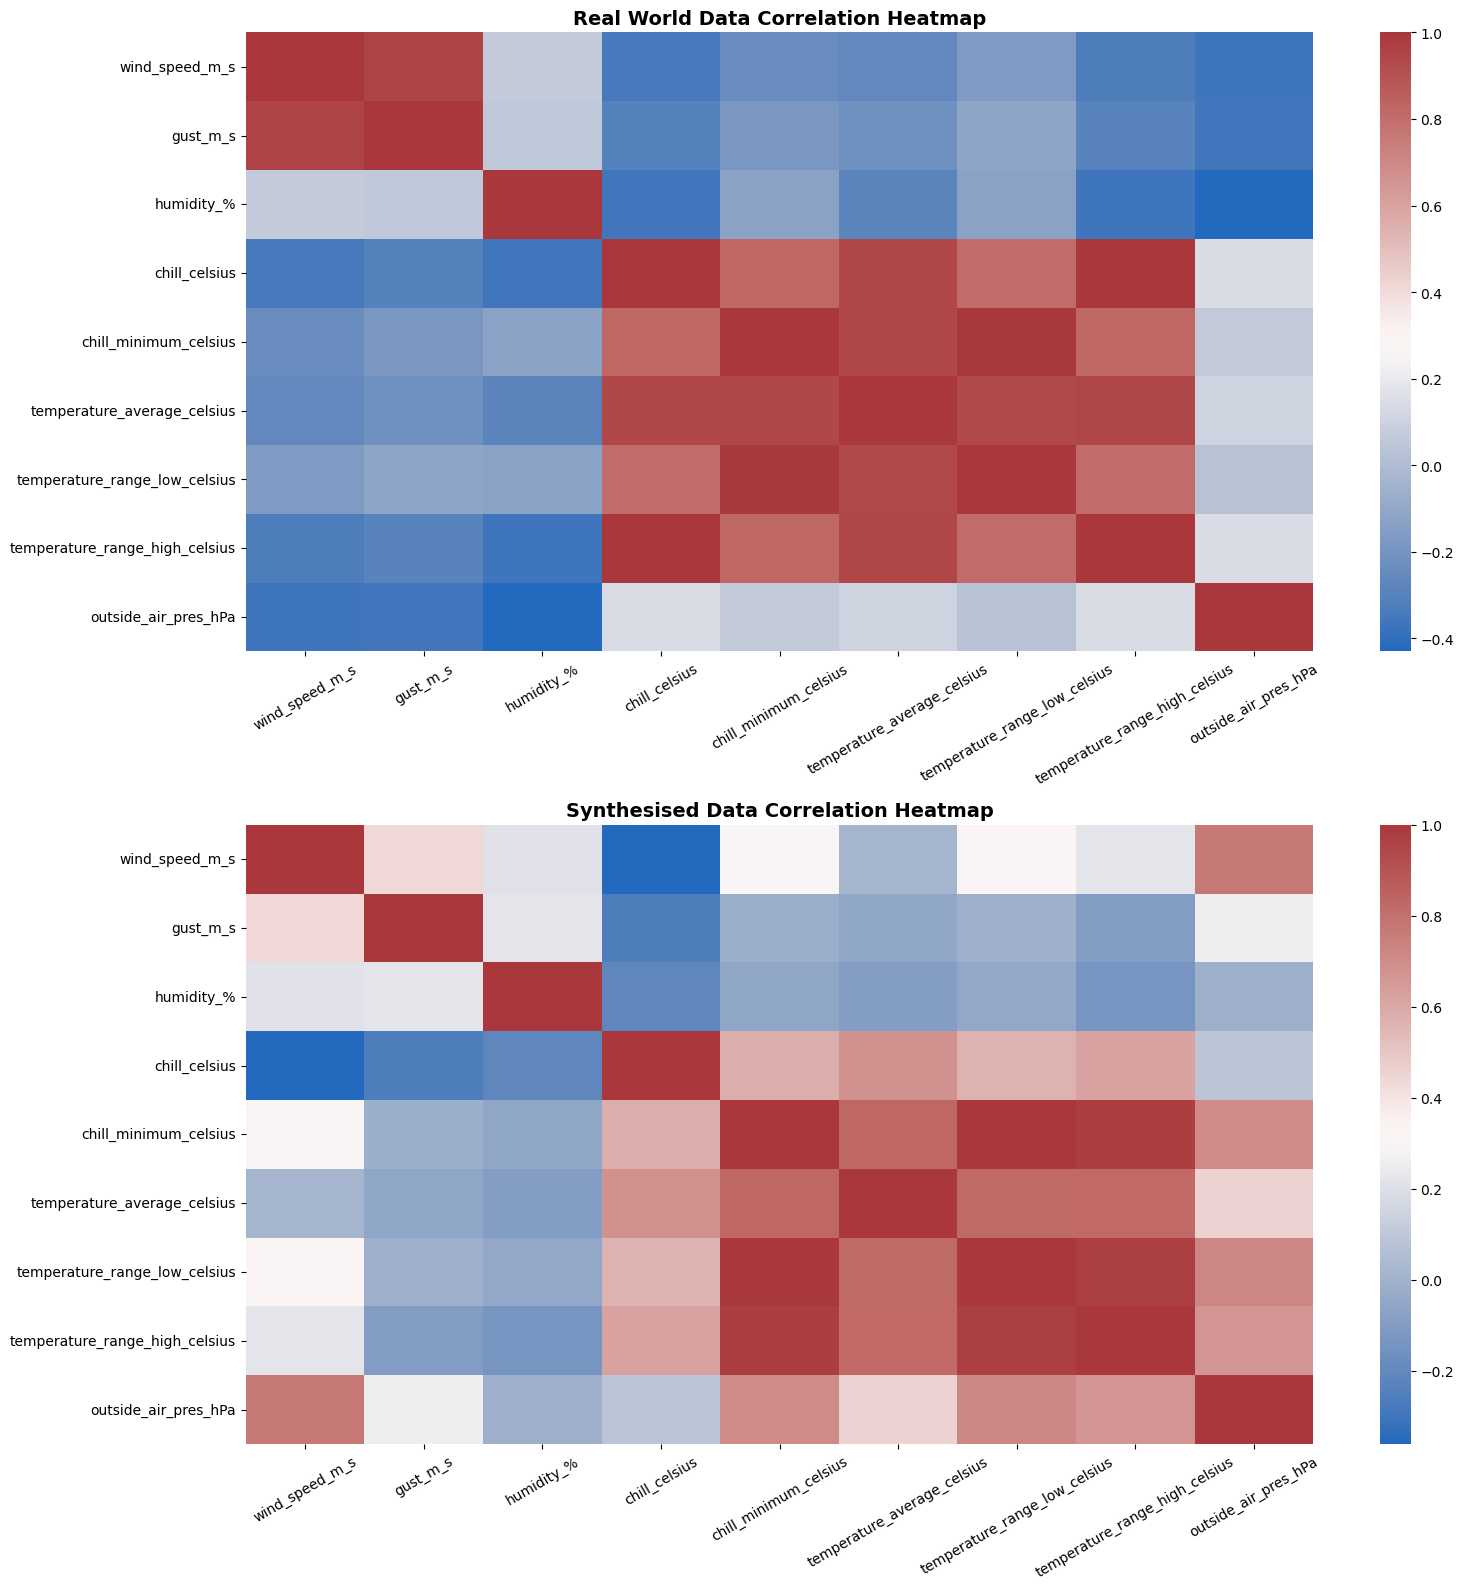

In [136]:
plt.rcParams["figure.figsize"] = [16, 16]
plt.rcParams["figure.autolayout"] = True


fig, (ax1, ax2) = plt.subplots(2,1)
sns.heatmap(corr_variable, cmap="vlag", ax=ax1).set_title('Real World Data Correlation Heatmap', color='black', size=14, weight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
sns.heatmap(synth_corr_variable, cmap="vlag", ax=ax2).set_title('Synthesised Data Correlation Heatmap', color='black', size=14, weight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)
plt.show()


---

## References <a id="references"></a>

Asseng S, Foster I, Turner NC (2011) The impact of temperature variability on wheat yields. Glob Change Biol 17(2):997–1012. https://​doi.​org/​10.​1111/j.​1365-​2486.​2010.​02262.x

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 7 Nov. 2023].

Chartio. (n.d.). How to Check If Any Value is NaN in a Pandas DataFrame. [online] Available at: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/. [Accessed 7 Nov. 2023].

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 10 Nov. 2023].

Cooper, N.W., Dossman, B.C., Berrigan, L.E., J. Morgan Brown, Cormier, D.A., Bégin-Marchand, C., Rodewald, A.D., Taylor, P.D., Tremblay, J.A. and Marra, P.P. (2023). Atmospheric pressure predicts probability of departure for migratory songbirds. 11(1). doi:https://doi.org/10.1186/s40462-022-00356-z.

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 7 Nov. 2023].

GeeksforGeeks. (2018). How to rename columns in Pandas DataFrame. [online] Available at: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/. [Accessed 7 Nov. 2023].

Gubler, S., Fukutome, S. and Scherrer, S.C. (2023). On the statistical distribution of temperature and the classification of extreme events considering season and climate change—an application in Switzerland. Theoretical and Applied Climatology, 153(3-4), pp.1273–1291. doi:https://doi.org/10.1007/s00704-023-04530-0.

Harmel RD, Richardson CW, Hanson CL, Johnson GL (2002) Evaluating the adequacy of simulating maximum and minimum daily air temperature with the normal distribution. J Appl Meteorol 41(7):744–753. https://doi.org/10.1175/1520-0450(2002)041%3c0744:ETAOSM%3e2.0.CO;2

H, S. (2023). head () and tail () Functions Explained with Examples and Codes. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/. [Accessed 7 Nov. 2023].

Kjellstrom T, Holmer I, Lemke B (2009) Workplace heat stress, health and productivity – an increasing challenge for low and middleincome countries during climate change. Glob Health Action 2:1–3. https://​doi.​org/​10.​3402/​gha.​v2i0.​2047

Kumar, S. (2021). Deep Dive Analysis of Missing Values in Dataset. [online] Medium. Available at: https://towardsdatascience.com/deep-dive-analysis-of-missing-values-in-dataset-b387d9de6d4b. [Accessed 7 Nov. 2023].

Malli (2022). How To Concatenate NumPy Arrays. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/python/numpy-concatenate-arrays/. [Accessed 13 Nov. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

Musa Esıt (2022). The Determination of the Most Appropriate Probability Distribution Models for the Meteorological Variables. Bitlis Eren üniversitesi fen bilimleri dergisi, 11(4), pp.1026–1041. doi:https://doi.org/10.17798/bitlisfen.1168077. [Accessed 10 Nov. 2023].

Name, Y. (2022). Pandas filter dates by month, hour, day and last N days & weeks. [online] kanoki. Available at: https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 9 Nov. 2023].

numpy.org. (n.d.). numpy.random.Generator.rayleigh — NumPy v1.26 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.rayleigh.html#numpy.random.Generator.rayleigh [Accessed 10 Nov. 2023].

pandas.pydata.org. (2023). pandas.DataFrame — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. [Accessed 13 Nov. 2023].

pandas.pydata.org. (n.d.). Time series / date functionality — pandas 1.2.3 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/timeseries.html. [Accessed 13 Nov. 2023].

Paraschiv, L.-S., Paraschiv, S. and Ion, I.V. (2019). Investigation of wind power density distribution using Rayleigh probability density function. Energy Procedia, 157, pp.1546–1552. doi:https://doi.org/10.1016/j.egypro.2018.11.320. [Accesed 10 Nov. 2023].

Pascual M, Ahumada JA, Chaves LF, Rodó X, Bouma M (2006) Malaria resurgence in the East African highlands: temperature trends revisited, PNAS, April 11 103 (15):5829–5834. https://d​oi.​org/​10.​1073/​pnas.​05089​29103

Ruff TW, Neelin JD (2012) Long tails in regional surface temperature probability distributions with implications for extremes underglobal warming. Geophys Res Lett 39:4704. https://doi.org/10.1029/2011GL050610

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe? [online] Available at: https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How to find probability distribution and parameters for real data? (Python 3). [online] Available at: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3 [Accessed 16 Nov. 2023].

Stack Overflow. (n.d.). python: rayleigh fit (histogram). [online] Available at: https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 7 Nov. 2023].

Treadwell, M. (2014). Tableau Pills: Continuous and Discrete Data Roles. [online] InterWorks. Available at: https://interworks.com/blog/mtreadwell/2014/02/19/tableau-pills-continuous-and-discrete-data-roles/ [Accessed 7 Nov. 2023].

Walker, J. (2019). Tutorial: Time Series Analysis with Pandas – Dataquest. [online] Dataquest. Available at: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/. [Accessed 7 Nov. 2023].

Wheeler TR, Craufurd PQ, Ellis RH, Porter JH, Prasad PV (2000) Temperature variability and the yield of annual crops. Agr Ecosyst Environ 82(1–3):159–167. https://​doi.​org/​10.​1016/​S01678809(00)​00224-3

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 8 Nov. 2023].

Wikipedia Contributors (2023). Irish calendar. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Irish_calendar [Accessed 9 Nov. 2023].

www.javatpoint.com. (n.d.). Pandas DataFrame.describe() - javatpoint. [online] Available at: https://www.javatpoint.com/pandas-dataframe-describe. [Accessed 8 Nov. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 7 Nov. 2023].

Zach (2021). How to Find Duplicates in Pandas DataFrame (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-find-duplicates/. [Accessed 3 Nov. 2023].

## Associated Reading <a id="associated-reading"></a>

docs.python.org. (n.d.). pathlib — Object-oriented filesystem paths — Python 3.9.4 documentation. [online] Available at: https://docs.python.org/3/library/pathlib.html. [Accessed 23 Nov. 2023].

Flom, P. (2019). Are dates nominal, ordinal, interval or ratio? [online] Medium. Available at: https://medium.com/@peterflom/are-dates-nominal-ordinal-interval-or-ratio-ef567e10884 [Accessed 7 Nov. 2023].

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 8 Nov 2023].

numpy.org. (n.d.). Overview — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/index.html. [Accessed 8 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). API reference — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/index.html. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). How to handle time series data with ease — pandas 2.1.2 documentation. [online] Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 7 Nov. 2023].

---

*Notebook Ends*